In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
#matplotlib.use("pgf")

import matplotlib.pyplot as plt
"""
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
"""
import numpy as np
import itertools
import os
plt.style.use('ggplot')

In [2]:
df_mnli_teacher = pd.read_excel("results/bert_mnli_teacher_results.xlsx")


df_stsb_teacher = pd.read_excel("results/bert_stsb_teacher_results.xlsx")
#df_stsb_teacher["init_layers"] = "teacher"
#df_stsb_teacher["num_hidden_layers"] = "teacher"
#df_stsb_teacher["hidden_size"] = "teacher"
#df_stsb_teacher


df_mlm_teacher  = pd.read_excel("results/bert_mlm_teacher_results.xlsx")
#df_mlm_teacher["num_hidden_layers"] = "teacher"
df_mlm_teacher["seed"] = 1909

df_stsb_hl_init_bias3 = pd.read_excel("results/stsb_kd_hl_bias3_init_results.xlsx")
df_stsb_hl_init_bias7 = pd.read_excel("results/stsb_kd_hl_bias7_init_results.xlsx")

df_mnli_hl_init_bias7 = pd.read_excel("results/mnli_kd_hl_bias7_init_results.xlsx")

df_mlm = pd.read_excel("results/mlm_kd_hl_results.xlsx")
df_mlm_debias = pd.read_excel("results/mlm_debias_kd_hl_results.xlsx")
df_mlm_debias50000 = pd.read_excel("results/mlm_debias50000_kd_hl_results.xlsx")
#df_mlm = df_mlm.append(df_mlm_teacher)
#df_mlm_debias = df_mlm_debias.append(df_mlm_teacher)
#df_mlm_debias50000 = df_mlm_debias50000.append(df_mlm_teacher)
df_mlm["seed"] = 1909
df_mlm_debias["seed"] = 1909
df_mlm_debias50000["seed"] = 1909

df_hl = pd.read_excel("results/mnli_kd_hl_results.xlsx")
df_hs = pd.read_excel("results/mnli_kd_hl4_hs_results.xlsx")
df_init = pd.read_excel("results/mnli_kd_diff_layers_init_results.xlsx")
df_stsb_hl_init = pd.read_excel("results/stsb_kd_hl_all_init_results.xlsx")
df_mnli_hl_all_init = pd.read_excel("results/mnli_kd_hl_all_init_results.xlsx")

df_mnli_hl_no_init_no_ma = pd.read_excel("results/mnli_kd_hl_no_init_results.xlsx")

#df_stsb_hl_init=df_stsb_hl_init.append(df_stsb_teacher)
#df_init = df_init.append(df_teacher)
#df_hl = df_hl.append(df_teacher)
#df_mnli_hl_all_init = df_mnli_hl_all_init.append(df_teacher)
#df_stsb_hl_init_bias3 = df_stsb_hl_init_bias3.append(df_stsb_teacher)
#df_stsb_hl_init_bias7 = df_stsb_hl_init_bias7.append(df_stsb_teacher)
#df_teacher["num_hidden_layers"] = 3
#df_hs = df_hs.append(df_teacher)
#df_teacher["num_hidden_layers"] = 4
#df_hs = df_hs.append(df_teacher)
#df_hs = df_hs[df_hs["num_hidden_layers"]==4]


df_mlm_mnli = pd.read_excel("results/mlm_kd_hl_mnli_results.xlsx")
#df_mlm_mnli = df_mlm_mnli.append(df_teacher)
df_mlm_stsb = pd.read_excel("results/mlm_kd_hl_stsb_results.xlsx")
#df_mlm_stsb = df_mlm_stsb.append(df_stsb_teacher)
df_mlm_debias_stsb = pd.read_excel("results/mlm_debias_kd_hl_stsb_results.xlsx")
#df_mlm_debias_stsb = df_mlm_debias_stsb.append(df_stsb_teacher)
df_mlm_debias50000_stsb = pd.read_excel("results/mlm_debias50000_kd_hl_stsb_results.xlsx")
#df_mlm_debias50000_stsb = df_mlm_debias50000_stsb.append(df_stsb_teacher)
df_mlm_debias_mnli = pd.read_excel("results/mlm_debias_kd_hl_mnli_results.xlsx")
#df_mlm_debias_mnli = df_mlm_debias_mnli.append(df_teacher)

In [7]:
weat_columns = []
for i in range (3,9):
    weat_columns.append(f"weat_{i}_effect_size")
seat_tests = "sent-weat3,sent-weat3b,sent-weat4,sent-weat5,sent-weat5b,sent-weat6,sent-weat6b,sent-weat7,sent-weat7b,sent-weat8,sent-weat8b,sent-weat9,sent-weat10,sent-angry_black_woman_stereotype,sent-angry_black_woman_stereotype_b,heilman_double_bind_competent_1,heilman_double_bind_competent_1-,heilman_double_bind_competent_one_sentence,heilman_double_bind_competent_one_word,sent-heilman_double_bind_competent_one_word,heilman_double_bind_likable_1,heilman_double_bind_likable_1-,heilman_double_bind_likable_one_sentence,heilman_double_bind_likable_one_word,sent-heilman_double_bind_likable_one_word".split(",")
seat_columns = [test+"_effect_size" for test in seat_tests]
at_gender_bias_tests = ["weat_6","weat_7","weat_8","sent-weat6","sent-weat6b","sent-weat7","sent-weat7b","sent-weat8","sent-weat8b"]#, "heilman_double_bind_competent_1","heilman_double_bind_competent_1-","heilman_double_bind_competent_one_sentence","heilman_double_bind_likable_1","heilman_double_bind_likable_1-","heilman_double_bind_likable_one_sentence"]
at_gender_bias_columns = [test+"_effect_size" for test in at_gender_bias_tests]
at_racial_bias_tests = ["weat_3","weat_4","weat_5","sent-weat3","sent-weat3b","sent-weat4","sent-weat5","sent-weat5b"]
at_racial_bias_columns = [test+"_effect_size" for test in at_racial_bias_tests]
at_abw_bias_tests = ["sent-angry_black_woman_stereotype","sent-angry_black_woman_stereotype_b"]
at_db_bias_tests = ["heilman_double_bind_competent_1","heilman_double_bind_competent_1-","heilman_double_bind_competent_one_sentence","heilman_double_bind_likable_1","heilman_double_bind_likable_1-","heilman_double_bind_likable_one_sentence"]
at_abw_bias_columns = [test+"_effect_size" for test in at_abw_bias_tests]
at_db_bias_columns = [test+"_effect_size" for test in at_db_bias_tests]

In [37]:
df_stsb_teacher.describe()

seed  learning_rate  batch_size      epoch  best_score  \
count  3.000000e+00        3.00000    3.000000   3.000000    3.000000   
mean   1.806943e+07        0.00005   26.666667   9.666667    0.897462   
std    2.241577e+07        0.00000    9.237604   0.577350    0.003534   
min    1.909000e+03        0.00005   16.000000   9.000000    0.893466   
25%    5.526966e+06        0.00005   24.000000   9.500000    0.896105   
50%    1.105202e+07        0.00005   32.000000  10.000000    0.898744   
75%    2.710319e+07        0.00005   32.000000  10.000000    0.899460   
max    4.315436e+07        0.00005   32.000000  10.000000    0.900176   

       crows_score   abs_avg       avg  weat_3_effect_size  weat_3_p  \
count     3.000000  3.000000  3.000000            3.000000  3.000000   
mean      0.604111  0.403000  0.319000            0.473946  0.008767   
std       0.000000  0.110014  0.065207            0.025743  0.003668   
min       0.604111  0.276000  0.257000            0.445903  0.005900   
25%       0.604111  0.370000  0.285000            0.462665  0.006700   
50%       0.604111  0.464000  0.313000            0.479428  0.007500   
75%       0.604111  0.466500  0.350000            0.487967  0.010200   
max       0.604111  0.469000  0.387000            0.496506  0.012900   

       weat_4_effect_size  weat_4_p  weat_5_effect_size  weat_5_p  \
count            3.000000  3.000000            3.000000   3.00000   
mean             0.578082  0.049567            0.527717   0.06090   
std              0.119492  0.030336            0.070213   0.02301   
min              0.483808  0.016300            0.460388   0.03830   
25%              0.510888  0.036500            0.491327   0.04920   
50%              0.537967  0.056700            0.522266   0.06010   
75%              0.625219  0.066200            0.561381   0.07220   
max              0.712470  0.075700            0.600496   0.08430   

       weat_6_effect_size  weat_6_p  weat_7_effect_size  weat_7_p  \
count            3.000000  3.000000            3.000000  3.000000   
mean             1.214580  0.007666            1.343565  0.001269   
std              0.070982  0.003731            0.210318  0.001809   
min              1.147907  0.003885            1.149790  0.000000   
25%              1.177270  0.005828            1.231733  0.000233   
50%              1.206632  0.007770            1.313677  0.000466   
75%              1.247917  0.009557            1.440452  0.001904   
max              1.289202  0.011344            1.567228  0.003341   

       weat_8_effect_size  weat_8_p  weat_9_effect_size  weat_9_p  \
count            3.000000  3.000000            3.000000  3.000000   
mean             0.642980  0.122429            0.499167  0.213925   
std              0.153743  0.068278            0.010382  0.005447   
min              0.468096  0.073271            0.493141  0.208874   
25%              0.586044  0.083450            0.493173  0.211039   
50%              0.703991  0.093629            0.493205  0.213203   
75%              0.730422  0.147009            0.502180  0.216450   
max              0.756853  0.200389            0.511154  0.219697   

       weat_10_effect_size  weat_10_p  sent-weat3_effect_size  sent-weat3_p  \
count             3.000000   3.000000                3.000000       3.00000   
mean             -0.277988   0.695079                0.822231       0.00001   
std               0.075731   0.050003                0.064009       0.00000   
min              -0.364516   0.658508                0.762691       0.00001   
25%              -0.305092   0.666589                0.788384       0.00001   
50%              -0.245669   0.674670                0.814077       0.00001   
75%              -0.234723   0.713364                0.852002       0.00001   
max              -0.223778   0.752059                0.889926       0.00001   

       sent-weat3b_effect_size  sent-weat3b_p  sent-weat4_effect_size  \
count                 3.000000       3.000000            

In [ ]:
df_mlm_teacher

In [ ]:
pd.set_option('display.max_columns', None)

In [36]:
df_mlm_debias.describe()

Unnamed: 0  crows_score  crows_score_gender  crows_score_race  \
count         6.0     6.000000            6.000000          6.000000   
mean          0.0     0.500221            0.501272          0.489987   
std           0.0     0.019817            0.052869          0.029197   
min           0.0     0.476127            0.404580          0.461240   
25%           0.0     0.485411            0.494275          0.477229   
50%           0.0     0.500995            0.515267          0.479651   
75%           0.0     0.510610            0.521947          0.493702   
max           0.0     0.529178            0.561069          0.544574   

       weat_3_effect_size  weat_3_p  weat_4_effect_size  weat_4_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean             0.166974  0.380333            0.255950  0.262100   
std              0.344061  0.327729            0.225209  0.181847   
min             -0.127856  0.000000           -0.051625  0.033600   
25%             -0.085508  0.089975            0.151024  0.159275   
50%              0.052025  0.408100            0.237209  0.243750   
75%              0.311816  0.659925            0.341343  0.332875   
max              0.758590  0.738000            0.614558  0.557800   

       weat_5_effect_size  weat_5_p  weat_6_effect_size  weat_6_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean            -0.084409  0.586617            1.361575  0.003561   
std              0.162765  0.175332            0.134092  0.002644   
min             -0.296737  0.410000            1.212286  0.000311   
25%             -0.218491  0.435125            1.267346  0.001593   
50%             -0.048702  0.556950            1.334214  0.003613   
75%              0.055262  0.733375            1.442104  0.005051   
max              0.072857  0.809100            1.565614  0.007382   

       weat_7_effect_size  weat_7_p  weat_8_effect_size  weat_8_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean             0.818896  0.084887            0.403997  0.258029   
std              0.325458  0.075482            0.319680  0.123222   
min              0.426327  0.001010            0.212812  0.019347   
25%              0.678922  0.032187            0.225674  0.253768   
50%              0.711899  0.089977            0.289155  0.296503   
75%              0.962280  0.100039            0.360654  0.336033   
max              1.349579  0.212044            1.043862  0.347086   

       weat_9_effect_size  weat_9_p  weat_10_effect_size  weat_10_p  \
count            6.000000  6.000000             6.000000   6.000000   
mean            -0.061071  0.533730            -0.396335   0.745118   
std              0.307403  0.183035             0.304644   0.180229   
min             -0.497924  0.354978            -0.726076   0.478244   
25%             -0.285563  0.393669            -0.625929   0.626030   
50%              0.029086  0.478896            -0.450794   0.800894   
75%              0.171387  0.668831            -0.183925   0.879254   
max              0.244951  0.792208             0.028932   0.917560   

       sent-weat3_effect_size  sent-weat3_p  sent-weat3b_effect_size  \
count                6.000000      6.000000                 6.000000   
mean                 0.123586      0.295230                 0.438824   
std                  0.328950      0.447453                 0.376286   
min                 -0.441298      0.000010                -0.070657   
25%                 -0.001642      0.000420                 0.186580   
50%                  0.203006      0.024500                 0.450127   
75%                  0.342633      0.553608                 0.718837   
max                  0.457482      1.000000                 0.896209   

       sent-weat3b_p  sent-weat4_effect_size  sent-weat4_p  \
count       6.000000                6.000000      6.000000   
mean        0.136942                0.223349      0.204218   
std         0.305

In [32]:
df_mlm.describe()

Unnamed: 0  crows_score  crows_score_gender  crows_score_race  \
count         6.0     6.000000            6.000000          6.000000   
mean          0.0     0.496021            0.503817          0.481266   
std           0.0     0.033964            0.041881          0.068788   
min           0.0     0.470822            0.442748          0.428295   
25%           0.0     0.476956            0.487595          0.437984   
50%           0.0     0.488064            0.496183          0.452519   
75%           0.0     0.491711            0.536260          0.497578   
max           0.0     0.562997            0.553435          0.608527   

       weat_3_effect_size  weat_3_p  weat_4_effect_size  weat_4_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean             0.868258  0.037617            0.837030  0.040517   
std              0.353785  0.092142            0.299027  0.094310   
min              0.153740  0.000000            0.249259  0.000200   
25%              0.940416  0.000000            0.869350  0.000800   
50%              1.007529  0.000000            0.903569  0.002750   
75%              1.041030  0.000000            1.016962  0.003875   
max              1.070509  0.225700            1.053081  0.233000   

       weat_5_effect_size  weat_5_p  weat_6_effect_size  weat_6_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean            -0.253081  0.701200            1.420845  0.003794   
std              0.472713  0.344425            0.222869  0.004703   
min             -0.806693  0.048700            1.163647  0.000078   
25%             -0.535839  0.678675            1.229014  0.000369   
50%             -0.258440  0.773900            1.428976  0.001476   
75%             -0.159450  0.922675            1.600295  0.007479   
max              0.559842  0.991500            1.683710  0.010256   

       weat_7_effect_size  weat_7_p  weat_8_effect_size  weat_8_p  \
count            6.000000  6.000000            6.000000  6.000000   
mean             1.168927  0.014763            0.416283  0.240236   
std              0.215953  0.015389            0.248079  0.125259   
min              0.928066  0.000233            0.146936  0.062549   
25%              0.982711  0.002545            0.247658  0.155070   
50%              1.166523  0.010023            0.357664  0.260295   
75%              1.330742  0.026826            0.550893  0.325602   
max              1.445529  0.035820            0.809145  0.390909   

       weat_9_effect_size  weat_9_p  weat_10_effect_size  weat_10_p  \
count            6.000000  6.000000             6.000000   6.000000   
mean             0.001079  0.494769            -0.381243   0.732595   
std              0.262407  0.151030             0.320007   0.172568   
min             -0.489206  0.357143            -0.792299   0.487490   
25%             -0.030648  0.394481            -0.633136   0.649981   
50%              0.055358  0.464286            -0.292557   0.707498   
75%              0.175802  0.520292            -0.208516   0.871193   
max              0.228330  0.772727             0.017121   0.936519   

       sent-weat3_effect_size  sent-weat3_p  sent-weat3b_effect_size  \
count                6.000000      6.000000                 6.000000   
mean                 0.035028      0.454733                 0.151419   
std                  0.525075      0.507844                 0.244484   
min                 -0.784894      0.000010                -0.199272   
25%                 -0.243904      0.000045                 0.030443   
50%                  0.137225      0.364300                 0.122694   
75%                  0.366207      0.931948                 0.333968   
max                  0.649022      1.000000                 0.458312   

       sent-weat3b_p  sent-weat4_effect_size  sent-weat4_p  \
count       6.000000                6.000000      6.000000   
mean        0.280968               -0.118801      0.608068   
std         0.381

In [14]:
df_mlm_debias_mnli.describe()

Unnamed: 0          seed  learning_rate  batch_size  epoch  best_score  \
count        18.0  1.800000e+01      18.000000   18.000000   18.0   18.000000   
mean          0.0  1.806943e+07       0.000024   22.222222   10.0    0.759398   
std           0.0  1.883301e+07       0.000008    8.026101    0.0    0.051189   
min           0.0  1.909000e+03       0.000020   16.000000   10.0    0.661578   
25%           0.0  1.909000e+03       0.000020   16.000000   10.0    0.734149   
50%           0.0  1.105202e+07       0.000020   16.000000   10.0    0.776403   
75%           0.0  4.315436e+07       0.000030   32.000000   10.0    0.794550   
max           0.0  4.315436e+07       0.000050   32.000000   10.0    0.816562   

       crows_score  gender_net_neutral  gender_fraction_neutral  \
count    18.000000           18.000000                18.000000   
mean      0.500221            0.073169                 0.034480   
std       0.018615            0.036468                 0.035024   
min       0.476127            0.032169                 0.003031   
25%       0.482759            0.045362                 0.013267   
50%       0.500995            0.059579                 0.017495   
75%       0.511273            0.091742                 0.059893   
max       0.529178            0.156131                 0.121494   

       racial_net_neutral  racial_fraction_neutral  weat_3_effect_size  \
count           18.000000                18.000000           18.000000   
mean             0.135164                 0.101951            0.123247   
std              0.058117                 0.065297            0.256082   
min              0.041482                 0.010004           -0.291920   
25%              0.091316                 0.050574           -0.076387   
50%              0.142653                 0.087153            0.086389   
75%              0.182811                 0.168922            0.243500   
max              0.215064                 0.202712            0.551549   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.373294            0.026629   0.496644            0.004084   
std     0.306479            0.343220   0.308442            0.243309   
min     0.003100           -0.452432   0.029600           -0.318723   
25%     0.116750           -0.225612   0.195075           -0.168599   
50%     0.333250           -0.111594   0.624800           -0.084434   
75%     0.645775            0.305120   0.743250            0.111052   
max     0.930300            0.632955   0.903000            0.502006   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.505056            1.334127   0.004675            0.846400   
std     0.239174            0.124181   0.004377            0.283772   
min     0.069300            1.086268   0.000311            0.346913   
25%     0.374050            1.278140   0.002040            0.701105   
50%     0.590650            1.356355   0.003147            0.780651   
75%     0.686450            1.398021   0.005322            1.087670   
max     0.821000            1.571158   0.016395            1.503233   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.075067            0.383384   0.272529            0.603413   
std     0.068032            0.332167   0.179556            0.446783   
min     0.000311           -0.100820   0.011500           -0.233486   
25%     0.014802            0.096636   0.137665            0.517280   
50%     0.068260            0.385898   0.240132            0.691839   
75%     0.092813            0.582579   0.429176            0.973489   
max     0.258586            1.103923   0.581818            1.095093   

        weat_9_p  weat_10_effect_size  weat_10_p  sent-weat3_effect_size  \
count  18.

In [18]:
df_mlm_mnli.describe()

Unnamed: 0          seed  learning_rate  batch_size  epoch  best_score  \
count        18.0  1.800000e+01      18.000000   18.000000   18.0   18.000000   
mean          0.0  1.806943e+07       0.000023   20.444444   10.0    0.759842   
std           0.0  1.883301e+07       0.000008    7.374218    0.0    0.050465   
min           0.0  1.909000e+03       0.000020   16.000000   10.0    0.661731   
25%           0.0  1.909000e+03       0.000020   16.000000   10.0    0.740256   
50%           0.0  1.105202e+07       0.000020   16.000000   10.0    0.774925   
75%           0.0  4.315436e+07       0.000020   28.000000   10.0    0.794881   
max           0.0  4.315436e+07       0.000050   32.000000   10.0    0.814730   

       crows_score  gender_net_neutral  gender_fraction_neutral  \
count    18.000000           18.000000                18.000000   
mean      0.496021            0.072062                 0.034792   
std       0.031903            0.045212                 0.040441   
min       0.470822            0.018388                 0.002895   
25%       0.473475            0.045574                 0.010655   
50%       0.488064            0.065206                 0.020964   
75%       0.492706            0.082760                 0.040817   
max       0.562997            0.204685                 0.159112   

       racial_net_neutral  racial_fraction_neutral  weat_3_effect_size  \
count           18.000000                18.000000           18.000000   
mean             0.163481                 0.128838            0.138664   
std              0.088369                 0.095268            0.206734   
min              0.043005                 0.018571           -0.153758   
25%              0.100080                 0.047618           -0.012753   
50%              0.142122                 0.110902            0.120495   
75%              0.212622                 0.183346            0.351758   
max              0.370788                 0.366418            0.447450   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.329028            0.110589   0.403750            0.009753   
std     0.268222            0.288213   0.266022            0.255538   
min     0.013100           -0.361278   0.024700           -0.353227   
25%     0.056975           -0.063449   0.148250           -0.179541   
50%     0.275100            0.085183   0.404200           -0.037067   
75%     0.530325            0.350570   0.566425            0.139512   
max     0.773700            0.660151   0.847000            0.427240   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.496139            1.353902   0.005888            1.194397   
std     0.255088            0.185275   0.008405            0.344050   
min     0.106700            0.974933   0.000389            0.513327   
25%     0.341025            1.257476   0.000874            0.964174   
50%     0.546100            1.408503   0.002331            1.352600   
75%     0.693400            1.509899   0.005439            1.435627   
max     0.846800            1.564276   0.028982            1.617564   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.027040            0.518708   0.201243            0.646731   
std     0.047051            0.311772   0.142050            0.500507   
min     0.000000            0.046316   0.012432           -0.343883   
25%     0.000194            0.335865   0.091162            0.494083   
50%     0.001399            0.455776   0.204934            0.790705   
75%     0.028594            0.708353   0.263928            1.011160   
max     0.168065            1.073716   0.470085            1.255283   

        weat_9_p  weat_10_effect_size  weat_10_p  sent-weat3_effect_size  \
count  18.

In [15]:
df_mlm_debias_stsb.describe()

Unnamed: 0          seed  learning_rate  batch_size  epoch  best_score  \
count        18.0  1.800000e+01      18.000000   18.000000   18.0   18.000000   
mean          0.0  1.806943e+07       0.000047   17.777778   10.0    0.644159   
std           0.0  1.883301e+07       0.000008    5.174093    0.0    0.259255   
min           0.0  1.909000e+03       0.000020   16.000000   10.0    0.218507   
25%           0.0  1.909000e+03       0.000050   16.000000   10.0    0.355693   
50%           0.0  1.105202e+07       0.000050   16.000000   10.0    0.783227   
75%           0.0  4.315436e+07       0.000050   16.000000   10.0    0.831445   
max           0.0  4.315436e+07       0.000050   32.000000   10.0    0.881637   

       crows_score    abs_avg        avg  weat_3_effect_size   weat_3_p  \
count    18.000000  18.000000  18.000000           18.000000  18.000000   
mean      0.500221   0.287556   0.121944            0.174487   0.265161   
std       0.018615   0.163346   0.273854            0.180957   0.224387   
min       0.476127   0.045000  -0.714000           -0.094080   0.002100   
25%       0.482759   0.207750  -0.012250            0.017177   0.071200   
50%       0.500995   0.265000   0.172500            0.162515   0.214200   
75%       0.511273   0.351250   0.323500            0.296849   0.471050   
max       0.529178   0.756000   0.509000            0.578648   0.671600   

       weat_4_effect_size   weat_4_p  weat_5_effect_size   weat_5_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             0.262917   0.246539            0.027523   0.470978   
std              0.182856   0.161816            0.153872   0.167055   
min             -0.071650   0.059100           -0.205896   0.199900   
25%              0.188946   0.121025           -0.082449   0.390375   
50%              0.268118   0.215650            0.010580   0.488700   
75%              0.401560   0.292000            0.092034   0.592775   
max              0.531407   0.579300            0.283162   0.724800   

       weat_6_effect_size   weat_6_p  weat_7_effect_size   weat_7_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             1.315260   0.006229            0.896671   0.080985   
std              0.165585   0.007009            0.389431   0.083885   
min              0.981312   0.000311            0.307411   0.000000   
25%              1.193750   0.002137            0.650221   0.003827   
50%              1.339415   0.003186            0.760480   0.073737   
75%              1.393459   0.008392            1.261938   0.109071   
max              1.587531   0.027817            1.504400   0.282984   

       weat_8_effect_size   weat_8_p  weat_9_effect_size   weat_9_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             0.399628   0.256307           -0.170638   0.591751   
std              0.288677   0.130817            0.358747   0.198988   
min              0.059670   0.019114           -0.870634   0.284632   
25%              0.214390   0.223135           -0.480557   0.446699   
50%              0.328886   0.271795           -0.088451   0.559524   
75%              0.403568   0.343803            0.080614   0.777597   
max              1.021243   0.455944            0.366906   0.925325   

       weat_10_effect_size  weat_10_p  sent-weat3_effect_size  sent-weat3_p  \
count            18.000000  18.000000               18.000000     18.000000   
mean             -0.418185   0.762821                0.214362      0.258579   
std               0.246900   0.135447                0.353611      0.401323   
min              -0.790027   0.538073               -0.622453      0.000010   
25%              -0.672518   0.692871                0.045200      0.000010   
50%              -0.381594   0.762821                0.231470      0.008295   
75%              -0.269160   0.899670                0.469106      0.304570   
max              -0.053516   0.935509            

In [19]:
df_mlm_stsb.describe()

Unnamed: 0          seed  learning_rate  batch_size  epoch  best_score  \
count        18.0  1.800000e+01      18.000000   18.000000   18.0   18.000000   
mean          0.0  1.806943e+07       0.000049   16.888889   10.0    0.665161   
std           0.0  1.883301e+07       0.000005    3.771236    0.0    0.232058   
min           0.0  1.909000e+03       0.000030   16.000000   10.0    0.277645   
25%           0.0  1.909000e+03       0.000050   16.000000   10.0    0.426734   
50%           0.0  1.105202e+07       0.000050   16.000000   10.0    0.780772   
75%           0.0  4.315436e+07       0.000050   16.000000   10.0    0.837329   
max           0.0  4.315436e+07       0.000050   32.000000   10.0    0.875707   

       crows_score   abs_avg        avg  weat_3_effect_size   weat_3_p  \
count    18.000000  18.00000  18.000000           18.000000  18.000000   
mean      0.496021   0.26200   0.012611            0.661993   0.035144   
std       0.031903   0.11835   0.239094            0.335696   0.062610   
min       0.470822   0.14400  -0.612000            0.181004   0.000000   
25%       0.473475   0.17300  -0.069750            0.357280   0.000000   
50%       0.488064   0.23650   0.057000            0.708936   0.000150   
75%       0.492706   0.32175   0.148250            0.855543   0.039075   
max       0.562997   0.63700   0.311000            1.233356   0.185800   

       weat_4_effect_size   weat_4_p  weat_5_effect_size   weat_5_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             0.657056   0.073372           -0.057351   0.582472   
std              0.309926   0.094184            0.455399   0.319111   
min              0.231472   0.000100           -0.659365   0.002200   
25%              0.343934   0.004375           -0.361876   0.521450   
50%              0.651600   0.024400           -0.104120   0.621100   
75%              0.874503   0.160850           -0.022046   0.844925   
max              1.206022   0.248700            0.942179   0.975200   

       weat_6_effect_size   weat_6_p  weat_7_effect_size   weat_7_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             1.450559   0.002543            1.226337   0.017111   
std              0.174437   0.003602            0.261659   0.033761   
min              1.126159   0.000078            0.572759   0.000000   
25%              1.348050   0.000155            1.018555   0.001340   
50%              1.462095   0.001282            1.330424   0.002991   
75%              1.591215   0.002797            1.427161   0.022747   
max              1.695091   0.012743            1.548768   0.145144   

       weat_8_effect_size   weat_8_p  weat_9_effect_size   weat_9_p  \
count           18.000000  18.000000           18.000000  18.000000   
mean             0.524025   0.193831           -0.138877   0.571128   
std              0.278834   0.120770            0.333342   0.182784   
min              0.135243   0.011577           -0.921054   0.292208   
25%              0.320163   0.100058           -0.362109   0.412067   
50%              0.438717   0.206488           -0.083515   0.562771   
75%              0.673246   0.284577            0.139858   0.709145   
max              1.107208   0.401709            0.336768   0.931818   

       weat_10_effect_size  weat_10_p  sent-weat3_effect_size  sent-weat3_p  \
count            18.000000  18.000000               18.000000     18.000000   
mean             -0.322825   0.695019                0.290665      0.280616   
std               0.329016   0.187635                0.461227      0.401067   
min              -0.786569   0.342968               -0.629656      0.000010   
25%              -0.710147   0.542191                0.015186      0.000010   
50%              -0.264191   0.689200                0.234010      0.012395   
75%              -0.056792   0.911616                0.653388      0.434080   
max               0.215419   0.934732                1.086

In [16]:
df_mnli_hl_init_bias7.describe()

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  2.400000e+01          24.000000         24.0    24.000000   24.000000   
mean   1.806943e+07           4.875000        768.0     5.500000   93.333333   
std    1.869604e+07           2.908944          0.0     1.978141   32.574552   
min    1.909000e+03           1.000000        768.0     4.000000   64.000000   
25%    1.909000e+03           2.750000        768.0     4.000000   64.000000   
50%    1.105202e+07           4.500000        768.0     4.000000   64.000000   
75%    4.315436e+07           6.500000        768.0     8.000000  128.000000   
max    4.315436e+07          10.000000        768.0     8.000000  128.000000   

           epoch  best_score  gender_net_neutral  gender_fraction_neutral  \
count  24.000000   24.000000           24.000000                24.000000   
mean    2.500000    0.697404            0.111770                 0.075838   
std     1.693979    0.111187            0.145516                 0.167984   
min     1.000000    0.393902            0.009860                 0.000281   
25%     1.000000    0.636520            0.035953                 0.003435   
50%     2.000000    0.751765            0.057115                 0.018244   
75%     3.250000    0.770040            0.142535                 0.054216   
max     7.000000    0.783782            0.713796                 0.813599   

       racial_net_neutral  racial_fraction_neutral  weat_3_effect_size  \
count           24.000000                24.000000           24.000000   
mean             0.318695                 0.293990            0.149738   
std              0.206332                 0.233163            0.241969   
min              0.058173                 0.013662           -0.293355   
25%              0.168412                 0.103533           -0.029238   
50%              0.289640                 0.233573            0.190229   
75%              0.424480                 0.433881            0.335444   
max              0.969827                 0.999608            0.664610   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.322825            0.051463   0.456721            0.031861   
std     0.312691            0.323780   0.283751            0.339478   
min     0.000400           -0.628709   0.016500           -0.565306   
25%     0.048975           -0.191723   0.224900           -0.148769   
50%     0.173850            0.072843   0.412400            0.022557   
75%     0.555375            0.259619   0.704675            0.240284   
max     0.926800            0.713293   0.966900            0.809860   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.477604            1.224649   0.008327            0.991833   
std     0.286456            0.093710   0.003965            0.353972   
min     0.008200            1.108504   0.001321            0.191289   
25%     0.247175            1.151045   0.004779            0.793661   
50%     0.472550            1.197367   0.008741            1.101918   
75%     0.664225            1.286502   0.011402            1.238959   
max     0.951100            1.472081   0.014297            1.391233   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.061386            0.332914   0.286668            0.218253   
std     0.106407            0.243607   0.143046            0.402412   
min     0.000544           -0.164695   0.054157           -0.397423   
25%     0.003205            0.221100   0.186208           -0.137823   
50%     0.012782            0.307793   0.285392            0.220383   
75%     0.064996            0.485946   0.340054            0.486937   
max     0.361305            0.827789   0.620513            0.886930   

        weat_

In [20]:
df_mnli_hl_all_init.describe()

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  3.000000e+01          30.000000         30.0    30.000000   30.000000   
mean   1.806943e+07           5.500000        768.0     5.600000   89.600000   
std    1.861528e+07           2.921384          0.0     1.993092   31.889464   
min    1.909000e+03           1.000000        768.0     4.000000   64.000000   
25%    1.909000e+03           3.000000        768.0     4.000000   64.000000   
50%    1.105202e+07           5.500000        768.0     4.000000   64.000000   
75%    4.315436e+07           8.000000        768.0     8.000000  128.000000   
max    4.315436e+07          10.000000        768.0     8.000000  128.000000   

           epoch  best_score  gender_net_neutral  gender_fraction_neutral  \
count  30.000000   30.000000           30.000000                30.000000   
mean    3.700000    0.764854            0.063920                 0.028256   
std     3.415482    0.042002            0.047492                 0.033755   
min     1.000000    0.657095            0.011470                 0.000645   
25%     1.000000    0.756797            0.024179                 0.003639   
50%     2.000000    0.772124            0.053524                 0.009401   
75%     5.000000    0.797870            0.084762                 0.050644   
max    13.000000    0.811727            0.182090                 0.108361   

       racial_net_neutral  racial_fraction_neutral  weat_3_effect_size  \
count           30.000000                30.000000           30.000000   
mean             0.160080                 0.119307            0.114605   
std              0.116896                 0.119534            0.259172   
min              0.024656                 0.006631           -0.471172   
25%              0.074645                 0.029479           -0.098189   
50%              0.147300                 0.084719            0.132071   
75%              0.195544                 0.149597            0.288422   
max              0.528601                 0.515816            0.683203   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.367283            0.067726   0.424253           -0.042618   
std     0.318226            0.333140   0.284922            0.320604   
min     0.000600           -0.791657   0.018200           -0.939190   
25%     0.076450           -0.153656   0.186625           -0.233043   
50%     0.259400            0.131960   0.350650           -0.034250   
75%     0.685425            0.302930   0.667925            0.146430   
max     0.991100            0.684203   0.989600            0.536842   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.530247            1.311326   0.010026            1.150528   
std     0.274869            0.215341   0.023648            0.365055   
min     0.053300            0.623247   0.000233            0.225949   
25%     0.338725            1.232223   0.001496            0.959792   
50%     0.536600            1.361056   0.002797            1.297866   
75%     0.747250            1.436850   0.006294            1.401608   
max     0.998100            1.619363   0.116939            1.492508   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.040961            0.444743   0.245234            0.729675   
std     0.083019            0.413528   0.229307            0.317398   
min     0.000000           -0.649373   0.020824           -0.119897   
25%     0.000253            0.241943   0.081041            0.642744   
50%     0.001515            0.535724   0.162432            0.817691   
75%     0.031818            0.739766   0.327409            0.890246   
max     0.337529            1.031278   0.892308            1.296714   

        weat_

In [17]:
df_stsb_hl_init_bias7.describe()

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  2.400000e+01          24.000000         24.0    24.000000   24.000000   
mean   1.806943e+07           4.875000        768.0     6.000000  101.333333   
std    1.869604e+07           2.908944          0.0     2.043016   32.231050   
min    1.909000e+03           1.000000        768.0     4.000000   64.000000   
25%    1.909000e+03           2.750000        768.0     4.000000   64.000000   
50%    1.105202e+07           4.500000        768.0     6.000000  128.000000   
75%    4.315436e+07           6.500000        768.0     8.000000  128.000000   
max    4.315436e+07          10.000000        768.0     8.000000  128.000000   

           epoch  best_score    abs_avg        avg  weat_3_effect_size  \
count  24.000000   24.000000  24.000000  24.000000           24.000000   
mean    9.333333    0.727340   0.413917   0.372792            0.288138   
std     6.799403    0.245800   0.311743   0.310954            0.152218   
min     3.000000    0.162134   0.008000  -0.021000           -0.033189   
25%     3.000000    0.757738   0.112250   0.068000            0.236701   
50%     6.500000    0.848047   0.421500   0.390000            0.288362   
75%    16.000000    0.865313   0.638000   0.581250            0.356232   
max    22.000000    0.875056   1.213000   1.144000            0.629845   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.124713            0.272884   0.235733            0.308285   
std     0.149463            0.179274   0.157466            0.203139   
min     0.001200           -0.114377   0.031200           -0.139818   
25%     0.039425            0.199752   0.130650            0.211847   
50%     0.074000            0.292806   0.194700            0.353779   
75%     0.120025            0.386208   0.274500            0.453262   
max     0.567700            0.621614   0.625800            0.554507   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.215833            1.280594   0.005167            1.275537   
std     0.179131            0.081506   0.002695            0.248951   
min     0.048700            1.153930   0.001243            0.705523   
25%     0.088750            1.211477   0.003244            1.187723   
50%     0.149900            1.293440   0.004312            1.345900   
75%     0.270475            1.328447   0.007498            1.438895   
max     0.658800            1.429630   0.009868            1.585444   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  24.000000           24.000000  24.000000           24.000000   
mean    0.011655            0.667136   0.118959            0.060645   
std     0.026239            0.192117   0.070515            0.295622   
min     0.000000            0.369122   0.014608           -0.509723   
25%     0.000155            0.543524   0.055866           -0.081899   
50%     0.001010            0.652179   0.109518            0.056569   
75%     0.004040            0.824687   0.156527            0.308244   
max     0.090987            1.069442   0.251282            0.657774   

        weat_9_p  weat_10_effect_size  weat_10_p  sent-weat3_effect_size  \
count  24.000000            24.000000  24.000000               24.000000   
mean    0.463429            -0.387352   0.757893                0.066371   
std     0.172853             0.142636   0.078406                0.473435   
min     0.145022            -0.693969   0.585936               -0.778374   
25%     0.313853            -0.450389   0.712238               -0.249112   
50%     0.464827            -0.345078   0.740598                0.049473   
75%     0.546537            -0.302912   0.801787                0.304657   
max     0.794372            -0.122791   0.906760                1.130787   

       sent-weat3_p  s

In [21]:
df_stsb_hl_init.describe()

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  3.000000e+01          30.000000         30.0    30.000000   30.000000   
mean   1.806943e+07           5.500000        768.0     5.733333   98.133333   
std    1.861528e+07           2.921384          0.0     2.016028   32.474641   
min    1.909000e+03           1.000000        768.0     4.000000   64.000000   
25%    1.909000e+03           3.000000        768.0     4.000000   64.000000   
50%    1.105202e+07           5.500000        768.0     4.000000  128.000000   
75%    4.315436e+07           8.000000        768.0     8.000000  128.000000   
max    4.315436e+07          10.000000        768.0     8.000000  128.000000   

           epoch  best_score    abs_avg        avg  weat_3_effect_size  \
count  30.000000   30.000000  30.000000  30.000000           30.000000   
mean    7.666667    0.709840   0.395767   0.332367            0.159086   
std     5.743562    0.253070   0.276997   0.300134            0.213684   
min     2.000000    0.150589   0.010000  -0.325000           -0.202109   
25%     4.000000    0.737172   0.171250   0.107500           -0.017522   
50%     7.000000    0.835020   0.360500   0.295500            0.119116   
75%     8.000000    0.868061   0.541750   0.522500            0.323027   
max    23.000000    0.879916   1.024000   1.024000            0.554926   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.306793            0.203616   0.313837           -0.007902   
std     0.261621            0.232063   0.200966            0.174137   
min     0.002500           -0.177454   0.023800           -0.335818   
25%     0.054000            0.043722   0.141575           -0.121683   
50%     0.276750            0.164003   0.318150           -0.045277   
75%     0.542125            0.364601   0.447950            0.118242   
max     0.840700            0.660537   0.692700            0.513148   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.513980            1.298362   0.005610            1.147367   
std     0.177170            0.119059   0.004738            0.348524   
min     0.067800            1.064233   0.000466            0.552429   
25%     0.364525            1.244332   0.001981            0.803401   
50%     0.551100            1.303200   0.004468            1.291310   
75%     0.638175            1.394385   0.006138            1.473114   
max     0.840500            1.534736   0.018260            1.596582   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  30.000000           30.000000  30.000000           30.000000   
mean    0.032393            0.509881   0.203297            0.025015   
std     0.043361            0.304905   0.146891            0.335620   
min     0.000000           -0.006344   0.011500           -0.628039   
25%     0.000253            0.282816   0.075097           -0.128939   
50%     0.001127            0.449965   0.202137            0.030542   
75%     0.062063            0.749620   0.298213            0.269286   
max     0.149262            1.097717   0.504973            0.548337   

        weat_9_p  weat_10_effect_size  weat_10_p  sent-weat3_effect_size  \
count  30.000000            30.000000  30.000000               30.000000   
mean    0.482468            -0.285244   0.679490                0.215923   
std     0.193336             0.286724   0.167875                0.260037   
min     0.183983            -0.814664   0.399611               -0.306325   
25%     0.332522            -0.438701   0.544503                0.034223   
50%     0.479978            -0.223584   0.661111                0.272971   
75%     0.579275            -0.062297   0.794833                0.395043   
max     0.838745             0.149649   0.941647                0.692422   

       sent-weat3_p  s

In [7]:
def comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=None,variable_comparison=False, style_function=None):
    
    if not variable_values:
        variable_values = list(dict.fromkeys(df[variable_name].tolist()))
    
    multi_index1 = list(itertools.chain(*[(label, label) for label in test_labels]))
    multi_index2 = list(itertools.chain(*[("R", "RR") for label in test_labels]))
    multi_index = [multi_index1,multi_index2]
    test_labels = list(itertools.chain(*[(label + " diff.", label+ " rel.") for label in test_labels]))
    df_teacher_test = df_teacher[test_variables].mean()
    display(df_teacher_test)
    dfs_test = []
    for v in variable_values:
        df_test = df.loc[df[variable_name]==v][test_variables].mean()
        if variable_comparison:
            df_teacher_test = df_teacher.loc[df_teacher[variable_name]==v][test_variables][test_variables].mean()
            
    
        df_test_diff = df_test.subtract(df_teacher_test)
        df_test_rel = df_test_diff.divide(df_teacher_test)


        test_diff = df_test_diff.values
        test_rel = df_test_rel.values
        test = list(itertools.chain(*zip(test_diff, test_rel)))
        df_test = pd.Series(data=test,index=test_labels)

        df_test.name = v
        dfs_test.append(df_test)

    df_result = pd.concat(dfs_test,axis=1)
    df_result.index = multi_index
    df_result['mean'] = df_result.mean(axis=1)
    df_result = df_result.round(decimals=2)
    if style_function:
        df_style = df_result.style.applymap(negative_bold)
        latex_str = df_style.format(escape=False,precision=2).to_latex(position="t!",hrules=False,convert_css=True)
        print(latex_str)
        return df_style
    else:  
        latex_str = df_result.style.format(escape=False,precision=2).to_latex(position="t!",hrules=False)
        print(latex_str)
        return df_result

In [8]:
df = df_mlm_mnli
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = weat_columns +["gender_net_neutral","racial_net_neutral"]
test_labels = ["WEAT 3", "WEAT 4", "WEAT 5", "WEAT 6", "WEAT 7", "WEAT 8","Bias-NLI Gender","Bias-NLI Race"]
comparison_table(df,df_teacher,variable_name,test_variables, test_labels)

weat_3_effect_size    0.331392
weat_4_effect_size    0.417903
weat_5_effect_size    0.314384
weat_6_effect_size    1.164348
weat_7_effect_size    1.357690
weat_8_effect_size    0.535505
gender_net_neutral    0.046898
racial_net_neutral    0.165099
dtype: float64

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{WEAT 3} & R & -0.33 & -0.38 & -0.09 & 0.09 & -0.27 & -0.18 & -0.19 \\
 & RR & -0.99 & -1.16 & -0.27 & 0.28 & -0.80 & -0.55 & -0.58 \\
\multirow[c]{2}{*}{WEAT 4} & R & -0.37 & -0.61 & -0.35 & 0.04 & -0.24 & -0.33 & -0.31 \\
 & RR & -0.88 & -1.45 & -0.84 & 0.11 & -0.56 & -0.78 & -0.74 \\
\multirow[c]{2}{*}{WEAT 5} & R & -0.43 & -0.39 & -0.46 & 0.00 & -0.16 & -0.38 & -0.30 \\
 & RR & -1.38 & -1.25 & -1.45 & 0.01 & -0.52 & -1.21 & -0.97 \\
\multirow[c]{2}{*}{WEAT 6} & R & 0.32 & 0.36 & 0.04 & 0.22 & -0.06 & 0.26 & 0.19 \\
 & RR & 0.27 & 0.31 & 0.03 & 0.19 & -0.06 & 0.23 & 0.16 \\
\multirow[c]{2}{*}{WEAT 7} & R & -0.41 & 0.03 & 0.19 & -0.70 & -0.23 & 0.14 & -0.16 \\
 & RR & -0.30 & 0.02 & 0.14 & -0.52 & -0.17 & 0.10 & -0.12 \\
\multirow[c]{2}{*}{WEAT 8} & R & -0.20 & -0.02 & 0.25 & -0.25 & -0.21 & 0.33 & -0.02 \\
 & RR & -0.37 & -0.04 & 0.46 & -0.48 & -0.39 & 0.62 & -0.03 \\
\multirow[c]{2}

1     2     3     4     5     6  mean
WEAT 3          R  -0.33 -0.38 -0.09  0.09 -0.27 -0.18 -0.19
                RR -0.99 -1.16 -0.27  0.28 -0.80 -0.55 -0.58
WEAT 4          R  -0.37 -0.61 -0.35  0.04 -0.24 -0.33 -0.31
                RR -0.88 -1.45 -0.84  0.11 -0.56 -0.78 -0.74
WEAT 5          R  -0.43 -0.39 -0.46  0.00 -0.16 -0.38 -0.30
                RR -1.38 -1.25 -1.45  0.01 -0.52 -1.21 -0.97
WEAT 6          R   0.32  0.36  0.04  0.22 -0.06  0.26  0.19
                RR  0.27  0.31  0.03  0.19 -0.06  0.23  0.16
WEAT 7          R  -0.41  0.03  0.19 -0.70 -0.23  0.14 -0.16
                RR -0.30  0.02  0.14 -0.52 -0.17  0.10 -0.12
WEAT 8          R  -0.20 -0.02  0.25 -0.25 -0.21  0.33 -0.02
                RR -0.37 -0.04  0.46 -0.48 -0.39  0.62 -0.03
Bias-NLI Gender R   0.01  0.03  0.11  0.01 -0.01  0.01  0.03
                RR  0.25  0.55  2.24  0.17 -0.12  0.14  0.54
Bias-NLI Race   R  -0.05 -0.10  0.01  0.09  0.04  0.00 -0.00
                RR -0.31 -0.58  0.05  0.52  0.23  0.02 -0.01

In [8]:
df = df_mlm_mnli
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = ["sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size"]
test_labels = [ "SEAT 6", "SEAT 7", "SEAT 8"]
comparison_table(df,df_teacher,variable_name,test_variables, test_labels)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{SEAT 6} & R & 0.92 & 0.28 & -0.13 & 0.20 & -0.70 & -0.28 & 0.05 \\
 & RR & 2.52 & 0.76 & -0.37 & 0.54 & -1.91 & -0.75 & 0.13 \\
\multirow[c]{2}{*}{SEAT 7} & R & 1.18 & 0.98 & 0.75 & 0.09 & -0.06 & 0.55 & 0.58 \\
 & RR & -13.88 & -11.57 & -8.76 & -1.05 & 0.72 & -6.45 & -6.83 \\
\multirow[c]{2}{*}{SEAT 8} & R & 0.29 & -0.01 & -0.58 & -0.60 & -0.67 & -0.40 & -0.33 \\
 & RR & 0.51 & -0.01 & -1.03 & -1.07 & -1.19 & -0.70 & -0.58 \\
\end{tabular}
\end{table}



1      2     3     4     5     6  mean
SEAT 6 R    0.92   0.28 -0.13  0.20 -0.70 -0.28  0.05
       RR   2.52   0.76 -0.37  0.54 -1.91 -0.75  0.13
SEAT 7 R    1.18   0.98  0.75  0.09 -0.06  0.55  0.58
       RR -13.88 -11.57 -8.76 -1.05  0.72 -6.45 -6.83
SEAT 8 R    0.29  -0.01 -0.58 -0.60 -0.67 -0.40 -0.33
       RR   0.51  -0.01 -1.03 -1.07 -1.19 -0.70 -0.58

In [9]:
df = df_mlm_stsb
df_teacher = df_stsb_teacher
variable_name = "num_hidden_layers"
test_variables = ["abs_avg"]
test_labels = ["Bias-STS Gender"]
comparison_table(df,df_teacher,variable_name,test_variables, test_labels)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-STS Gender} & R & 0.01 & -0.12 & -0.21 & -0.21 & -0.12 & -0.20 & -0.14 \\
 & RR & 0.04 & -0.30 & -0.53 & -0.51 & -0.30 & -0.50 & -0.35 \\
\end{tabular}
\end{table}



1     2     3     4     5    6  mean
Bias-STS Gender R   0.01 -0.12 -0.21 -0.21 -0.12 -0.2 -0.14
                RR  0.04 -0.30 -0.53 -0.51 -0.30 -0.5 -0.35

In [11]:
df = df_mnli_hl_all_init
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns + ["sent-weat3_effect_size","sent-weat4_effect_size","sent-weat5_effect_size","sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race","WEAT 3", "WEAT 4", "WEAT 5", "WEAT 6", "WEAT 7", "WEAT 8"] + [ "SEAT 3", "SEAT 4", "SEAT 5","SEAT 6", "SEAT 7", "SEAT 8"]
variable_values = list(range(1,7))
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & 0.00 & 0.09 & 0.04 & 0.03 & -0.03 & 0.01 & 0.02 \\
 & RR & 0.02 & 1.91 & 0.94 & 0.71 & -0.55 & 0.17 & 0.53 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.05 & -0.02 & -0.02 & 0.06 & 0.02 & -0.03 & -0.01 \\
 & RR & -0.31 & -0.10 & -0.10 & 0.37 & 0.14 & -0.18 & -0.03 \\
\multirow[c]{2}{*}{WEAT 3} & R & -0.58 & -0.49 & -0.03 & 0.16 & -0.08 & -0.06 & -0.18 \\
 & RR & -1.75 & -1.47 & -0.08 & 0.48 & -0.25 & -0.17 & -0.54 \\
\multirow[c]{2}{*}{WEAT 4} & R & -1.01 & -0.67 & -0.24 & 0.11 & -0.10 & -0.22 & -0.36 \\
 & RR & -2.42 & -1.60 & -0.58 & 0.25 & -0.25 & -0.54 & -0.86 \\
\multirow[c]{2}{*}{WEAT 5} & R & -0.91 & -0.52 & -0.24 & 0.16 & -0.09 & -0.30 & -0.32 \\
 & RR & -2.89 & -1.66 & -0.75 & 0.50 & -0.29 & -0.95 & -1.01 \\
\multirow[c]{2}{*}{WEAT 6} & R & 0.19 & 0.05 & 0.18 & 0.37 & -0.34 & 0.29 & 0.13 \\
 & RR & 0.16 & 0.04 & 0.15 & 0.32 & -0.29 & 0.25 & 0.11 \\
\mult

1     2     3     4     5     6  mean
Bias-NLI Gender R   0.00  0.09  0.04  0.03 -0.03  0.01  0.02
                RR  0.02  1.91  0.94  0.71 -0.55  0.17  0.53
Bias-NLI Race   R  -0.05 -0.02 -0.02  0.06  0.02 -0.03 -0.01
                RR -0.31 -0.10 -0.10  0.37  0.14 -0.18 -0.03
WEAT 3          R  -0.58 -0.49 -0.03  0.16 -0.08 -0.06 -0.18
                RR -1.75 -1.47 -0.08  0.48 -0.25 -0.17 -0.54
WEAT 4          R  -1.01 -0.67 -0.24  0.11 -0.10 -0.22 -0.36
                RR -2.42 -1.60 -0.58  0.25 -0.25 -0.54 -0.86
WEAT 5          R  -0.91 -0.52 -0.24  0.16 -0.09 -0.30 -0.32
                RR -2.89 -1.66 -0.75  0.50 -0.29 -0.95 -1.01
WEAT 6          R   0.19  0.05  0.18  0.37 -0.34  0.29  0.13
                RR  0.16  0.04  0.15  0.32 -0.29  0.25  0.11
WEAT 7          R  -0.97 -0.70 -0.32 -0.16 -0.07  0.02 -0.37
                RR -0.72 -0.52 -0.23 -0.12 -0.05  0.01 -0.27
WEAT 8          R  -0.95 -0.11 -0.11  0.32 -0.53  0.28 -0.18
                RR -1.77 -0.21 -0.20  0.59 -0.99  0.53 -0.34
SEAT 3          R  -0.11 -0.12  0.04  0.42  0.34 -0.02  0.09
                RR  0.74  0.77 -0.24 -2.80 -2.27  0.15 -0.61
SEAT 4          R  -0.20 -0.02  0.28  0.60  0.34  0.32  0.22
                RR  0.48  0.04 -0.69 -1.48 -0.83 -0.80 -0.54
SEAT 5          R  -0.26 -0.01  0.23  0.60  0.42  0.37  0.22
                RR  0.57  0.03 -0.50 -1.33 -0.94 -0.82 -0.50
SEAT 6          R   0.52 -0.26  0.22  0.53 -0.30  0.14  0.14
                RR  1.43 -0.71  0.61  1.44 -0.82  0.38  0.39
SEAT 7          R   0.83  0.22  0.25  0.28  0.42  0.76  0.46
                RR -9.71 -2.59 -2.95 -3.27 -4.92 -8.92 -5.39
SEAT 8          R  -0.19 -0.29 -0.41 -0.34 -0.24 -0.33 -0.30
                RR -0.34 -0.51 -0.73 -0.60 -0.42 -0.59 -0.53

In [12]:
df = df_stsb_hl_init
df_teacher = df_stsb_teacher
variable_name = "num_hidden_layers"
test_variables = ["abs_avg"]
test_labels = ["Bias-STS Gender"]
variable_values = list(range(1,7))
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-STS Gender} & R & -0.39 & -0.14 & -0.26 & 0.24 & 0.07 & 0.20 & -0.05 \\
 & RR & -0.96 & -0.35 & -0.65 & 0.58 & 0.18 & 0.50 & -0.11 \\
\end{tabular}
\end{table}



1     2     3     4     5    6  mean
Bias-STS Gender R  -0.39 -0.14 -0.26  0.24  0.07  0.2 -0.05
                RR -0.96 -0.35 -0.65  0.58  0.18  0.5 -0.11

In [13]:
df = df_hl
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns + ["sent-weat3_effect_size","sent-weat4_effect_size","sent-weat5_effect_size","sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race","WEAT 3", "WEAT 4", "WEAT 5", "WEAT 6", "WEAT 7", "WEAT 8"] + [ "SEAT 3", "SEAT 4", "SEAT 5","SEAT 6", "SEAT 7", "SEAT 8"]
variable_values = None #list(range(1,7))
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values)

\begin{table}[t!]
\begin{tabular}{llrrrrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & 8 & 10 & 12 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & -0.02 & -0.01 & -0.02 & -0.01 & -0.00 & -0.02 & -0.02 & -0.02 & -0.02 & -0.02 \\
 & RR & -0.41 & -0.12 & -0.32 & -0.31 & -0.05 & -0.51 & -0.47 & -0.49 & -0.51 & -0.36 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.09 & -0.07 & -0.00 & 0.08 & 0.14 & 0.03 & 0.05 & 0.02 & 0.03 & 0.02 \\
 & RR & -0.53 & -0.44 & -0.00 & 0.46 & 0.82 & 0.20 & 0.33 & 0.12 & 0.21 & 0.13 \\
\multirow[c]{2}{*}{WEAT 3} & R & -0.52 & -0.38 & -0.17 & 0.03 & 0.05 & 0.02 & 0.04 & 0.19 & 0.11 & -0.07 \\
 & RR & -1.56 & -1.15 & -0.51 & 0.08 & 0.17 & 0.07 & 0.13 & 0.58 & 0.34 & -0.21 \\
\multirow[c]{2}{*}{WEAT 4} & R & -0.86 & -0.43 & -0.06 & 0.29 & 0.32 & 0.26 & 0.35 & 0.40 & 0.27 & 0.06 \\
 & RR & -2.05 & -1.03 & -0.15 & 0.68 & 0.75 & 0.62 & 0.84 & 0.97 & 0.63 & 0.14 \\
\multirow[c]{2}{*}{WEAT 5} & R & -0.59 & -0.57 & -0.13 & 0.13 & 0.17 & 0.12 & 0.25 & 0.34 & 0.21 & -0.01 \\
 & R

1     2     3     4     5     6     8    10    12  mean
Bias-NLI Gender R  -0.02 -0.01 -0.02 -0.01 -0.00 -0.02 -0.02 -0.02 -0.02 -0.02
                RR -0.41 -0.12 -0.32 -0.31 -0.05 -0.51 -0.47 -0.49 -0.51 -0.36
Bias-NLI Race   R  -0.09 -0.07 -0.00  0.08  0.14  0.03  0.05  0.02  0.03  0.02
                RR -0.53 -0.44 -0.00  0.46  0.82  0.20  0.33  0.12  0.21  0.13
WEAT 3          R  -0.52 -0.38 -0.17  0.03  0.05  0.02  0.04  0.19  0.11 -0.07
                RR -1.56 -1.15 -0.51  0.08  0.17  0.07  0.13  0.58  0.34 -0.21
WEAT 4          R  -0.86 -0.43 -0.06  0.29  0.32  0.26  0.35  0.40  0.27  0.06
                RR -2.05 -1.03 -0.15  0.68  0.75  0.62  0.84  0.97  0.63  0.14
WEAT 5          R  -0.59 -0.57 -0.13  0.13  0.17  0.12  0.25  0.34  0.21 -0.01
                RR -1.88 -1.81 -0.43  0.41  0.53  0.37  0.80  1.08  0.66 -0.03
WEAT 6          R  -0.25 -0.10 -0.16  0.44  0.42  0.43  0.28  0.30  0.35  0.19
                RR -0.21 -0.09 -0.13  0.38  0.36  0.37  0.24  0.26  0.30  0.16
WEAT 7          R  -1.44 -0.65 -0.23 -0.08 -0.03 -0.07  0.08 -0.03  0.05 -0.27
                RR -1.06 -0.48 -0.17 -0.06 -0.02 -0.05  0.06 -0.02  0.04 -0.20
WEAT 8          R  -0.92 -0.54 -0.18 -0.38 -0.16 -0.05 -0.12 -0.15  0.03 -0.27
                RR -1.71 -1.00 -0.33 -0.71 -0.30 -0.09 -0.23 -0.28  0.06 -0.51
SEAT 3          R   0.34  0.21  0.39  0.58  0.26  0.30  0.32  0.14  0.12  0.30
                RR -2.28 -1.37 -2.61 -3.83 -1.75 -1.98 -2.09 -0.95 -0.82 -1.96
SEAT 4          R   0.15  0.30  0.58  0.68  0.43  0.47  0.46  0.30  0.29  0.40
                RR -0.36 -0.73 -1.43 -1.69 -1.06 -1.15 -1.14 -0.73 -0.71 -1.00
SEAT 5          R   0.10  0.29  0.60  0.82  0.48  0.43  0.35  0.28  0.15  0.39
                RR -0.22 -0.65 -1.32 -1.82 -1.07 -0.96 -0.78 -0.61 -0.34 -0.86
SEAT 6          R   0.20  0.14  0.44  0.15 -0.02  0.51  0.24  0.02  0.06  0.19
                RR  0.55  0.38  1.19  0.41 -0.07  1.40  0.65  0.07  0.16  0.53
SEAT 7          R   0.49  0.28  0.40  0.18  0.50  0.12  0.70  0.15  0.50  0.37
                RR -5.73 -3.29 -4.76 -2.14 -5.83 -1.39 -8.19 -1.75 -5.83 -4.33
SEAT 8          R  -0.57 -0.20 -0.46 -0.37 -0.37 -0.63 -0.14 -0.17 -0.34 -0.36
                RR -1.01 -0.36 -0.81 -0.65 -0.65 -1.11 -0.25 -0.31 -0.60 -0.64

In [14]:
df = df_mnli_hl_init_bias7
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns[3:6] + ["sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size","sent-angry_black_woman_stereotype_effect_size","sent-angry_black_woman_stereotype_b_effect_size","heilman_double_bind_competent_1_effect_size","heilman_double_bind_likable_1_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race", "WEAT 6", "WEAT 7", "WEAT 8"] + ["SEAT 6", "SEAT 7", "SEAT 8","SEAT ABW", "SEAT ABW b", "SEAT HDB Competent", "SEAT HDB Likable"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = None#negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=False,style_function=style_function)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & 0.01 & 0.03 & 0.06 & 0.08 & 0.10 & 0.03 & 0.05 \\
 & RR & 0.16 & 0.59 & 1.24 & 1.69 & 2.13 & 0.53 & 1.06 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.06 & -0.02 & 0.15 & 0.27 & 0.21 & 0.25 & 0.13 \\
 & RR & -0.38 & -0.11 & 0.90 & 1.65 & 1.25 & 1.50 & 0.80 \\
\multirow[c]{2}{*}{WEAT 6} & R & 0.14 & 0.01 & 0.03 & 0.08 & 0.11 & 0.04 & 0.07 \\
 & RR & 0.12 & 0.01 & 0.02 & 0.07 & 0.10 & 0.03 & 0.06 \\
\multirow[c]{2}{*}{WEAT 7} & R & -0.99 & -0.45 & -0.65 & -0.26 & -0.27 & -0.09 & -0.45 \\
 & RR & -0.73 & -0.33 & -0.48 & -0.19 & -0.20 & -0.07 & -0.33 \\
\multirow[c]{2}{*}{WEAT 8} & R & -0.40 & -0.15 & -0.43 & -0.19 & -0.17 & -0.14 & -0.25 \\
 & RR & -0.75 & -0.27 & -0.80 & -0.35 & -0.32 & -0.26 & -0.46 \\
\multirow[c]{2}{*}{SEAT 6} & R & 0.21 & 0.04 & 0.19 & -0.32 & 0.34 & 0.20 & 0.11 \\
 & RR & 0.58 & 0.10 & 0.51 & -0.86 & 0.94 & 0.54 & 0.30 \\
\multirow[c]{2}{*}{SE

1     2     3     4     5     6  mean
Bias-NLI Gender    R   0.01  0.03  0.06  0.08  0.10  0.03  0.05
                   RR  0.16  0.59  1.24  1.69  2.13  0.53  1.06
Bias-NLI Race      R  -0.06 -0.02  0.15  0.27  0.21  0.25  0.13
                   RR -0.38 -0.11  0.90  1.65  1.25  1.50  0.80
WEAT 6             R   0.14  0.01  0.03  0.08  0.11  0.04  0.07
                   RR  0.12  0.01  0.02  0.07  0.10  0.03  0.06
WEAT 7             R  -0.99 -0.45 -0.65 -0.26 -0.27 -0.09 -0.45
                   RR -0.73 -0.33 -0.48 -0.19 -0.20 -0.07 -0.33
WEAT 8             R  -0.40 -0.15 -0.43 -0.19 -0.17 -0.14 -0.25
                   RR -0.75 -0.27 -0.80 -0.35 -0.32 -0.26 -0.46
SEAT 6             R   0.21  0.04  0.19 -0.32  0.34  0.20  0.11
                   RR  0.58  0.10  0.51 -0.86  0.94  0.54  0.30
SEAT 7             R   0.59 -0.01  0.14  0.26  0.49 -0.06  0.23
                   RR -6.93  0.10 -1.61 -3.08 -5.80  0.75 -2.76
SEAT 8             R  -0.62 -0.77 -0.37 -0.59 -0.31 -0.48 -0.52
                   RR -1.09 -1.36 -0.66 -1.05 -0.55 -0.86 -0.93
SEAT ABW           R  -1.01 -0.87 -0.33 -0.09 -0.46 -0.50 -0.54
                   RR -5.24 -4.51 -1.71 -0.45 -2.39 -2.59 -2.81
SEAT ABW b         R   1.02  0.87  1.23  1.03  0.35  0.80  0.88
                   RR  2.40  2.04  2.87  2.40  0.83  1.88  2.07
SEAT HDB Competent R   0.65  0.54  0.74  0.60  0.77  0.95  0.71
                   RR -1.60 -1.34 -1.84 -1.48 -1.90 -2.35 -1.75
SEAT HDB Likable   R   0.52  0.64  0.81  0.81  0.93  1.20  0.82
                   RR -0.83 -1.02 -1.30 -1.30 -1.48 -1.92 -1.31

In [12]:

df_stsb_rule_1 = df_stsb_hl_init.loc[df_stsb_hl_init["num_hidden_layers"].isin([1,2])]
df_stsb_rule_2 = df_mlm_stsb.loc[df_mlm_stsb["num_hidden_layers"].isin([3,4,5,6])]
df_stsb_rule = pd.concat([df_stsb_rule_1,df_stsb_rule_2])
display(df_stsb_rule.describe())
display(df_stsb_rule)

df = df_stsb_rule
df_teacher = df_stsb_teacher
variable_name = "num_hidden_layers"
test_variables = ["abs_avg"]
test_labels = ["Bias-STS Gender"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=False,style_function=style_function)

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  1.800000e+01          18.000000          6.0     6.000000   18.000000   
mean   1.806943e+07           3.500000        768.0     5.333333   35.555556   
std    1.883301e+07           1.757338          0.0     2.065591   31.790162   
min    1.909000e+03           1.000000        768.0     4.000000   16.000000   
25%    1.909000e+03           2.000000        768.0     4.000000   16.000000   
50%    1.105202e+07           3.500000        768.0     4.000000   16.000000   
75%    4.315436e+07           5.000000        768.0     7.000000   64.000000   
max    4.315436e+07           6.000000        768.0     8.000000  128.000000   

           epoch  best_score    abs_avg        avg  weat_3_effect_size  \
count  18.000000   18.000000  18.000000  18.000000           18.000000   
mean   11.277778    0.622102   0.192333   0.048111            0.438127   
std     4.376482    0.293480   0.100685   0.151905            0.359300   
min     7.000000    0.150589   0.010000  -0.325000           -0.097251   
25%    10.000000    0.309140   0.156250   0.000500            0.094549   
50%    10.000000    0.780772   0.191000   0.055500            0.495342   
75%    10.000000    0.837329   0.265250   0.135750            0.765723   
max    23.000000    0.875707   0.347000   0.311000            0.940302   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.170611            0.454502   0.175239           -0.192518   
std     0.251921            0.335424   0.209970            0.251975   
min     0.000000           -0.102116   0.002800           -0.659365   
25%     0.000025            0.233140   0.014300           -0.366348   
50%     0.010650            0.529141   0.060850           -0.135605   
75%     0.328375            0.725390   0.248800           -0.029745   
max     0.687100            0.917977   0.612600            0.199721   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.666650            1.385091   0.003307            1.101212   
std     0.207213            0.141248   0.003452            0.359037   
min     0.283900            1.126159   0.000078            0.552429   
25%     0.534875            1.313943   0.001340            0.755173   
50%     0.654550            1.387182   0.002137            1.169552   
75%     0.845875            1.452645   0.003807            1.421620   
max     0.975200            1.661312   0.012743            1.548768   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.040344            0.562413   0.173755           -0.106622   
std     0.051878            0.280805   0.119775            0.367098   
min     0.000000            0.135243   0.011577           -0.921054   
25%     0.001340            0.379213   0.065987           -0.362109   
50%     0.012315            0.491095   0.181469           -0.083515   
75%     0.076127            0.785047   0.240948            0.195135   
max     0.149262            1.107208   0.401709            0.489797   

        weat_9_p  weat_10_effect_size  weat_10_p  sent-weat3_effect_size  \
count  18.000000            18.000000  18.000000               18.000000   
mean    0.555075            -0.322699   0.694755                0.167967   
std     0.204455             0.328955   0.187248                0.385642   
min     0.220779            -0.814664   0.342968               -0.629656   
25%     0.372565            -0.691055   0.542191                0.015186   
50%     0.562771            -0.264191   0.689200                0.106297   
75%     0.709145            -0.056792   0.905478                0.327198   
max     0.931818             0.215419   0.941647                1.017961   

       sent-weat3_p  s

base_model_name      seed  num_hidden_layers  hidden_size init_layers  \
0   bert-base-uncased      1909                  1        768.0      [0, 1]   
1   bert-base-uncased      1909                  2        768.0   [0, 1, 2]   
10  bert-base-uncased  43154364                  1        768.0      [0, 1]   
11  bert-base-uncased  43154364                  2        768.0   [0, 1, 2]   
20  bert-base-uncased  11052022                  1        768.0      [0, 1]   
21  bert-base-uncased  11052022                  2        768.0   [0, 1, 2]   
2                 NaN      1909                  3          NaN         NaN   
3                 NaN      1909                  4          NaN         NaN   
4                 NaN      1909                  5          NaN         NaN   
5                 NaN      1909                  6          NaN         NaN   
8                 NaN  43154364                  3          NaN         NaN   
9                 NaN  43154364                  4          NaN         NaN   
10                NaN  43154364                  5          NaN         NaN   
11                NaN  43154364                  6          NaN         NaN   
14                NaN  11052022                  3          NaN         NaN   
15                NaN  11052022                  4          NaN         NaN   
16                NaN  11052022                  5          NaN         NaN   
17                NaN  11052022                  6          NaN         NaN   

    temperature  batch_size  epoch  best_score  abs_avg    avg  \
0           8.0          64      8    0.165328    0.017  0.002   
1           4.0          64     23    0.301193    0.270  0.154   
10          4.0          64      7    0.159204    0.010  0.000   
11          4.0         128     22    0.332979    0.175  0.099   
20          8.0          64      8    0.150589    0.026 -0.020   
21          4.0          64     15    0.245826    0.345 -0.325   
2           NaN          16     10    0.765851    0.176  0.056   
3           NaN          16     10    0.787637    0.153  0.099   
4           NaN          16     10    0.837738    0.206  0.176   
5           NaN          16     10    0.875707    0.215  0.054   
8           NaN          16     10    0.766880    0.222  0.146   
9           NaN          16     10    0.807293    0.166  0.055   
10          NaN          16     10    0.836103    0.347  0.311   
11          NaN          16     10    0.875371    0.144  0.009   
14          NaN          16     10    0.773907    0.172 -0.096   
15          NaN          16     10    0.799577    0.273 -0.209   
16          NaN          16     10    0.841173    0.294  0.250   
17          NaN          16     10    0.875485    0.251  0.105   

    weat_3_effect_size  weat_3_p  weat_4_effect_size  weat_4_p  \
0            -0.047987    0.5966           -0.102116    0.6126   
1            -0.097251    0.6871            0.108907    0.3761   
10            0.005805    0.4939           -0.019225    0.5204   
11            0.065712    0.3763            0.224643    0.2555   
20           -0.043767    0.5892           -0.061631    0.5678   
21            0.181060    0.1846            0.331285    0.1646   
2             0.940302    0.0000            0.745376    0.0114   
3             0.815658    0.0000            0.893056    0.0036   
4             0.673284    0.0002            0.665433    0.0230   
5             0.292445    0.0746            0.258634    0.2287   
8             0.772768    0.0001            0.600849    0.0354   
9             0.807280    0.0000            0.798281    0.0085   
10            0.744588    0.0000            0.917977    0.0028   
11            0.337216    0.0457            0.304407    0.1904   
14            0.579655    0.0014            0.601114    0.0347   
15            0.573214    0.0021            0.637767    0.0258   
16            0.868838    0.0000            0.818842    0.0067   
17            0.417471    0.0192            0.457434    0.086

abs_avg    0.403
dtype: float64

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-STS Gender} & R & \bfseries -0.39 & \bfseries -0.14 & \bfseries -0.21 & \bfseries -0.21 & \bfseries -0.12 & \bfseries -0.20 & \bfseries -0.21 \\
 & RR & \bfseries -0.96 & \bfseries -0.35 & \bfseries -0.53 & \bfseries -0.51 & \bfseries -0.30 & \bfseries -0.50 & \bfseries -0.52 \\
\end{tabular}
\end{table}



In [11]:
df_mnli_rule_1 = df_mnli_hl_all_init.loc[df_mnli_hl_all_init["num_hidden_layers"].isin([1,2])]
df_mnli_rule_2 = df_mlm_mnli.loc[df_mlm_mnli["num_hidden_layers"].isin([3,4,5,6])]
df_mnli_rule = pd.concat([df_mnli_rule_1,df_mnli_rule_2])
df_mnli_rule.describe()

seed  num_hidden_layers  hidden_size  temperature  batch_size  \
count  1.800000e+01          18.000000          6.0     6.000000   18.000000   
mean   1.806943e+07           3.500000        768.0     6.666667   48.888889   
std    1.883301e+07           1.757338          0.0     2.065591   46.070137   
min    1.909000e+03           1.000000        768.0     4.000000   16.000000   
25%    1.909000e+03           2.000000        768.0     5.000000   16.000000   
50%    1.105202e+07           3.500000        768.0     8.000000   24.000000   
75%    4.315436e+07           5.000000        768.0     8.000000   64.000000   
max    4.315436e+07           6.000000        768.0     8.000000  128.000000   

           epoch  best_score  gender_net_neutral  gender_fraction_neutral  \
count  18.000000   18.000000           18.000000                18.000000   
mean    9.444444    0.759579            0.080935                 0.039848   
std     2.148111    0.050688            0.056911                 0.041344   
min     4.000000    0.657095            0.011656                 0.001666   
25%    10.000000    0.743119            0.045574                 0.013896   
50%    10.000000    0.774925            0.065961                 0.022945   
75%    10.000000    0.794881            0.106576                 0.053892   
max    13.000000    0.814730            0.204685                 0.159112   

       racial_net_neutral  racial_fraction_neutral  weat_3_effect_size  \
count           18.000000                18.000000           18.000000   
mean             0.176551                 0.141549            0.079242   
std              0.084339                 0.087925            0.275519   
min              0.038296                 0.024233           -0.471172   
25%              0.117569                 0.065189           -0.116615   
50%              0.173462                 0.142468            0.120495   
75%              0.216447                 0.183346            0.351758   
max              0.370788                 0.366418            0.447450   

        weat_3_p  weat_4_effect_size   weat_4_p  weat_5_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.411317           -0.007322   0.498561           -0.090903   
std     0.352672            0.403292   0.337895            0.361766   
min     0.013100           -0.791657   0.024700           -0.939190   
25%     0.056975           -0.276408   0.148250           -0.295905   
50%     0.275100           -0.061058   0.564450           -0.150328   
75%     0.717975            0.350570   0.788500            0.139512   
max     0.991100            0.660151   0.989600            0.427240   

        weat_5_p  weat_6_effect_size   weat_6_p  weat_7_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.567511            1.280542   0.007412            0.977862   
std     0.304101            0.160309   0.008017            0.471582   
min     0.106700            0.974933   0.000466            0.225949   
25%     0.341025            1.181168   0.002409            0.575951   
50%     0.665000            1.315597   0.004351            0.924222   
75%     0.803400            1.389342   0.008586            1.432427   
max     0.998100            1.521200   0.028982            1.617564   

        weat_7_p  weat_8_effect_size   weat_8_p  weat_9_effect_size  \
count  18.000000           18.000000  18.000000           18.000000   
mean    0.081814            0.378606   0.288151            0.745152   
std     0.100200            0.479093   0.260154            0.360415   
min     0.000000           -0.649373   0.012432           -0.070430   
25%     0.000311            0.168194   0.093862            0.557108   
50%     0.036869            0.368220   0.246076            0.790705   
75%     0.143026            0.699893   0.377370            0.986300   
max     0.337529            1.073716   0.892308            1.296714   

        weat_

In [10]:

df_mnli_rule_1 = df_mnli_hl_all_init.loc[df_mnli_hl_all_init["num_hidden_layers"].isin([1,2])]
df_mnli_rule_2 = df_mlm_mnli.loc[df_mlm_mnli["num_hidden_layers"].isin([3,4,5,6])]
df_mnli_rule = pd.concat([df_mnli_rule_1,df_mnli_rule_2])
display(df_mnli_rule)


df = df_mnli_rule
df_teacher = df_mnli_teacher
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns + ["sent-weat3_effect_size","sent-weat4_effect_size","sent-weat5_effect_size","sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race","WEAT 3", "WEAT 4", "WEAT 5", "WEAT 6", "WEAT 7", "WEAT 8"] + [ "SEAT 3", "SEAT 4", "SEAT 5","SEAT 6", "SEAT 7", "SEAT 8"]
variable_values = list(range(1,7))
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values)

base_model_name      seed  num_hidden_layers  hidden_size init_layers  \
0   bert-base-uncased      1909                  1        768.0      [0, 1]   
1   bert-base-uncased      1909                  2        768.0   [0, 1, 2]   
10  bert-base-uncased  43154364                  1        768.0      [0, 1]   
11  bert-base-uncased  43154364                  2        768.0   [0, 1, 2]   
20  bert-base-uncased  11052022                  1        768.0      [0, 1]   
21  bert-base-uncased  11052022                  2        768.0   [0, 1, 2]   
2                 NaN      1909                  3          NaN         NaN   
3                 NaN      1909                  4          NaN         NaN   
4                 NaN      1909                  5          NaN         NaN   
5                 NaN      1909                  6          NaN         NaN   
8                 NaN  43154364                  3          NaN         NaN   
9                 NaN  43154364                  4          NaN         NaN   
10                NaN  43154364                  5          NaN         NaN   
11                NaN  43154364                  6          NaN         NaN   
14                NaN  11052022                  3          NaN         NaN   
15                NaN  11052022                  4          NaN         NaN   
16                NaN  11052022                  5          NaN         NaN   
17                NaN  11052022                  6          NaN         NaN   

    temperature  batch_size  epoch  best_score  gender_net_neutral  \
0           4.0          64      9    0.663819            0.070179   
1           8.0         128     13    0.741847            0.162781   
10          8.0         128      4    0.657095            0.011656   
11          4.0         128      5    0.724083            0.064898   
20          8.0          64      7    0.670182            0.061191   
21          8.0         128     12    0.746937            0.182090   
2           NaN          16     10    0.758232            0.204685   
3           NaN          16     10    0.784394            0.045376   
4           NaN          16     10    0.795694            0.019079   
5           NaN          32     10    0.814730            0.050242   
8           NaN          16     10    0.765154            0.138271   
9           NaN          32     10    0.781389            0.046169   
10          NaN          16     10    0.795034            0.018388   
11          NaN          16     10    0.809489            0.042583   
14          NaN          16     10    0.768461            0.113522   
15          NaN          32     10    0.786938            0.072966   
16          NaN          16     10    0.794421            0.085738   
17          NaN          16     10    0.814526            0.067024   

    gender_fraction_neutral  racial_net_neutral  racial_fraction_neutral  \
0                  0.017974            0.187535                 0.156725   
1                  0.055841            0.216910                 0.134313   
10                 0.001666            0.038296                 0.024233   
11                 0.048045            0.077531                 0.064507   
20                 0.005089            0.116310                 0.051873   
21                 0.084169            0.149719                 0.049316   
2                  0.159112            0.151683                 0.121177   
3                  0.009986            0.205309                 0.168401   
4                  0.004743            0.080041                 0.067235   
5                  0.017598            0.195512                 0.173599   
8                  0.107502            0.121348                 0.100626   
9                  0.020878            0.249636                 0.215645   
10                 0.012662            0.159389                 0.150624   
11                 0.024840            0.215060                 0.213359   
14                 0.041744      

/tmp/ipykernel_2196466/3220696525.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_mnli_rule.mean())


seed                 1.806943e+07
num_hidden_layers    3.500000e+00
hidden_size          7.680000e+02
temperature          6.666667e+00
batch_size           4.888889e+01
                         ...     
crows_score          4.986737e-01
mlm_perplexity       9.429248e+02
kd_temperature       7.000000e+00
kd_batch_size        9.600000e+01
kd_epoch             1.100000e+01
Length: 84, dtype: float64

gender_net_neutral        0.046898
racial_net_neutral        0.165099
weat_3_effect_size        0.331392
weat_4_effect_size        0.417903
weat_5_effect_size        0.314384
weat_6_effect_size        1.164348
weat_7_effect_size        1.357690
weat_8_effect_size        0.535505
sent-weat3_effect_size   -0.150916
sent-weat4_effect_size   -0.405022
sent-weat5_effect_size   -0.449739
sent-weat6_effect_size    0.367033
sent-weat7_effect_size   -0.085090
sent-weat8_effect_size    0.564199
dtype: float64

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & 0.00 & 0.09 & 0.11 & 0.01 & -0.01 & 0.01 & 0.03 \\
 & RR & 0.02 & 1.91 & 2.24 & 0.17 & -0.12 & 0.14 & 0.73 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.05 & -0.02 & 0.01 & 0.09 & 0.04 & 0.00 & 0.01 \\
 & RR & -0.31 & -0.10 & 0.05 & 0.52 & 0.23 & 0.02 & 0.07 \\
\multirow[c]{2}{*}{WEAT 3} & R & -0.58 & -0.49 & -0.09 & 0.09 & -0.27 & -0.18 & -0.25 \\
 & RR & -1.75 & -1.47 & -0.27 & 0.28 & -0.80 & -0.55 & -0.76 \\
\multirow[c]{2}{*}{WEAT 4} & R & -1.01 & -0.67 & -0.35 & 0.04 & -0.24 & -0.33 & -0.43 \\
 & RR & -2.42 & -1.60 & -0.84 & 0.11 & -0.56 & -0.78 & -1.02 \\
\multirow[c]{2}{*}{WEAT 5} & R & -0.91 & -0.52 & -0.46 & 0.00 & -0.16 & -0.38 & -0.41 \\
 & RR & -2.89 & -1.66 & -1.45 & 0.01 & -0.52 & -1.21 & -1.29 \\
\multirow[c]{2}{*}{WEAT 6} & R & 0.19 & 0.05 & 0.04 & 0.22 & -0.06 & 0.26 & 0.12 \\
 & RR & 0.16 & 0.04 & 0.03 & 0.19 & -0.06 & 0.23 & 0.10 \\
\multirow[c

1     2     3     4     5     6  mean
Bias-NLI Gender R   0.00  0.09  0.11  0.01 -0.01  0.01  0.03
                RR  0.02  1.91  2.24  0.17 -0.12  0.14  0.73
Bias-NLI Race   R  -0.05 -0.02  0.01  0.09  0.04  0.00  0.01
                RR -0.31 -0.10  0.05  0.52  0.23  0.02  0.07
WEAT 3          R  -0.58 -0.49 -0.09  0.09 -0.27 -0.18 -0.25
                RR -1.75 -1.47 -0.27  0.28 -0.80 -0.55 -0.76
WEAT 4          R  -1.01 -0.67 -0.35  0.04 -0.24 -0.33 -0.43
                RR -2.42 -1.60 -0.84  0.11 -0.56 -0.78 -1.02
WEAT 5          R  -0.91 -0.52 -0.46  0.00 -0.16 -0.38 -0.41
                RR -2.89 -1.66 -1.45  0.01 -0.52 -1.21 -1.29
WEAT 6          R   0.19  0.05  0.04  0.22 -0.06  0.26  0.12
                RR  0.16  0.04  0.03  0.19 -0.06  0.23  0.10
WEAT 7          R  -0.97 -0.70  0.19 -0.70 -0.23  0.14 -0.38
                RR -0.72 -0.52  0.14 -0.52 -0.17  0.10 -0.28
WEAT 8          R  -0.95 -0.11  0.25 -0.25 -0.21  0.33 -0.16
                RR -1.77 -0.21  0.46 -0.48 -0.39  0.62 -0.29
SEAT 3          R  -0.11 -0.12  0.20  0.23  0.06 -0.05  0.04
                RR  0.74  0.77 -1.36 -1.52 -0.43  0.34 -0.24
SEAT 4          R  -0.20 -0.02  0.20  0.46  0.29  0.41  0.19
                RR  0.48  0.04 -0.50 -1.13 -0.72 -1.00 -0.47
SEAT 5          R  -0.26 -0.01  0.21  0.55  0.35  0.44  0.21
                RR  0.57  0.03 -0.47 -1.22 -0.78 -0.97 -0.47
SEAT 6          R   0.52 -0.26 -0.13  0.20 -0.70 -0.28 -0.11
                RR  1.43 -0.71 -0.37  0.54 -1.91 -0.75 -0.29
SEAT 7          R   0.83  0.22  0.75  0.09 -0.06  0.55  0.39
                RR -9.71 -2.59 -8.76 -1.05  0.72 -6.45 -4.64
SEAT 8          R  -0.19 -0.29 -0.58 -0.60 -0.67 -0.40 -0.46
                RR -0.34 -0.51 -1.03 -1.07 -1.19 -0.70 -0.81

In [15]:
df = df_mnli_hl_init_bias7
df_teacher = df_mnli_hl_all_init
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns[3:6] + ["sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size","sent-angry_black_woman_stereotype_effect_size","sent-angry_black_woman_stereotype_b_effect_size","heilman_double_bind_competent_1_effect_size","heilman_double_bind_likable_1_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race", "WEAT 6", "WEAT 7", "WEAT 8"] + ["SEAT 6", "SEAT 7", "SEAT 8","SEAT ABW", "SEAT ABW b", "SEAT HDB Competent", "SEAT HDB Likable"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = None#negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=True,style_function=style_function)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & 0.01 & -0.06 & 0.01 & 0.05 & 0.13 & 0.02 & 0.02 \\
 & RR & 0.14 & -0.45 & 0.16 & 0.57 & 5.99 & 0.31 & 1.12 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.01 & -0.00 & 0.16 & 0.21 & 0.18 & 0.28 & 0.14 \\
 & RR & -0.11 & -0.01 & 1.11 & 0.94 & 0.97 & 2.05 & 0.83 \\
\multirow[c]{2}{*}{WEAT 6} & R & -0.05 & -0.04 & -0.15 & -0.29 & 0.45 & -0.25 & -0.06 \\
 & RR & -0.04 & -0.03 & -0.11 & -0.19 & 0.54 & -0.17 & -0.00 \\
\multirow[c]{2}{*}{WEAT 7} & R & -0.01 & 0.25 & -0.34 & -0.10 & -0.20 & -0.11 & -0.08 \\
 & RR & -0.04 & 0.39 & -0.32 & -0.08 & -0.15 & -0.08 & -0.05 \\
\multirow[c]{2}{*}{WEAT 8} & R & 0.54 & -0.03 & -0.32 & -0.51 & 0.36 & -0.42 & -0.06 \\
 & RR & -1.32 & -0.07 & -0.75 & -0.59 & 95.48 & -0.52 & 15.37 \\
\multirow[c]{2}{*}{SEAT 6} & R & -0.31 & 0.30 & -0.04 & -0.84 & 0.65 & 0.06 & -0.03 \\
 & RR & -0.35 & 2.76 & -0.06 & -0.94 & 10.01 & 0.12 & 1.92 \\
\mult

1     2      3     4      5       6   mean
Bias-NLI Gender    R   0.01 -0.06   0.01  0.05   0.13    0.02   0.02
                   RR  0.14 -0.45   0.16  0.57   5.99    0.31   1.12
Bias-NLI Race      R  -0.01 -0.00   0.16  0.21   0.18    0.28   0.14
                   RR -0.11 -0.01   1.11  0.94   0.97    2.05   0.83
WEAT 6             R  -0.05 -0.04  -0.15 -0.29   0.45   -0.25  -0.06
                   RR -0.04 -0.03  -0.11 -0.19   0.54   -0.17  -0.00
WEAT 7             R  -0.01  0.25  -0.34 -0.10  -0.20   -0.11  -0.08
                   RR -0.04  0.39  -0.32 -0.08  -0.15   -0.08  -0.05
WEAT 8             R   0.54 -0.03  -0.32 -0.51   0.36   -0.42  -0.06
                   RR -1.32 -0.07  -0.75 -0.59  95.48   -0.52  15.37
SEAT 6             R  -0.31  0.30  -0.04 -0.84   0.65    0.06  -0.03
                   RR -0.35  2.76  -0.06 -0.94  10.01    0.12   1.92
SEAT 7             R  -0.24 -0.23  -0.11 -0.02   0.07   -0.82  -0.22
                   RR -0.32 -1.69  -0.69 -0.09   0.22   -1.22  -0.63
SEAT 8             R  -0.43 -0.48   0.04 -0.26  -0.07   -0.15  -0.22
                   RR -1.14 -1.75   0.26 -1.13  -0.22   -0.65  -0.77
SEAT ABW           R  -0.44 -0.31  -0.14 -0.14  -0.25   -0.00  -0.21
                   RR  1.14  0.82 -24.20 -0.56  15.94    0.01  -1.14
SEAT ABW b         R  -0.12  0.03   0.02  0.14  -0.92   -0.40  -0.21
                   RR -0.08  0.03   0.02  0.11  -0.54   -0.25  -0.12
SEAT HDB Competent R   0.28  0.30   0.02 -0.27  -0.38    0.38   0.05
                   RR -7.81 -1.82   0.06 -0.58  -0.51    2.30  -1.39
SEAT HDB Likable   R   0.31  0.13   0.02 -0.03  -0.41    0.58   0.10
                   RR -0.75 -1.12   0.09 -0.14  -0.57 -206.54 -34.84

In [16]:
df = df = df_stsb_hl_init_bias7
df_teacher = df_stsb_hl_init
variable_name = "num_hidden_layers"
test_variables = ["abs_avg"]
test_labels = ["Bias-STS Gender"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=True,style_function=style_function)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-STS Gender} & R & -0.00 & \bfseries -0.17 & 0.39 & \bfseries -0.30 & 0.10 & 0.03 & 0.01 \\
 & RR & \bfseries -0.21 & \bfseries -0.66 & 2.76 & \bfseries -0.47 & 0.20 & 0.05 & 0.28 \\
\end{tabular}
\end{table}



In [17]:

df = df_mlm_debias_mnli
df_teacher = df_mlm_mnli
variable_name = "num_hidden_layers"
test_variables = ["gender_net_neutral","racial_net_neutral"] +weat_columns[3:6] + ["sent-weat6_effect_size","sent-weat7_effect_size","sent-weat8_effect_size","sent-angry_black_woman_stereotype_effect_size","sent-angry_black_woman_stereotype_b_effect_size","heilman_double_bind_competent_1_effect_size","heilman_double_bind_likable_1_effect_size"]
test_labels = ["Bias-NLI Gender","Bias-NLI Race", "WEAT 6", "WEAT 7", "WEAT 8"] + ["SEAT 6", "SEAT 7", "SEAT 8","SEAT ABW", "SEAT ABW b", "SEAT HDB Competent", "SEAT HDB Likable"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = None#negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=True,style_function=style_function)

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-NLI Gender} & R & 0.00 & -0.02 & -0.02 & -0.01 & 0.00 & 0.05 & 0.00 \\
 & RR & 0.04 & -0.27 & -0.14 & -0.14 & 0.11 & 0.90 & 0.08 \\
\multirow[c]{2}{*}{Bias-NLI Race} & R & -0.00 & -0.02 & -0.06 & -0.07 & -0.02 & 0.01 & -0.03 \\
 & RR & -0.03 & -0.30 & -0.37 & -0.27 & -0.12 & 0.05 & -0.17 \\
\multirow[c]{2}{*}{WEAT 6} & R & -0.10 & -0.15 & 0.04 & -0.02 & 0.06 & 0.04 & -0.02 \\
 & RR & -0.06 & -0.10 & 0.04 & -0.01 & 0.05 & 0.03 & -0.01 \\
\multirow[c]{2}{*}{WEAT 7} & R & -0.25 & -0.50 & -0.64 & -0.13 & -0.35 & -0.22 & -0.35 \\
 & RR & -0.26 & -0.36 & -0.41 & -0.19 & -0.31 & -0.15 & -0.28 \\
\multirow[c]{2}{*}{WEAT 8} & R & -0.06 & 0.07 & -0.43 & -0.08 & -0.21 & -0.10 & -0.14 \\
 & RR & -0.18 & 0.14 & -0.55 & -0.30 & -0.64 & -0.12 & -0.27 \\
\multirow[c]{2}{*}{SEAT 6} & R & -0.78 & -0.18 & 0.01 & 0.06 & 0.21 & -0.22 & -0.15 \\
 & RR & -0.60 & -0.28 & 0.03 & 0.10 & -0.64 & -2.37 & -0.

1      2      3      4     5     6   mean
Bias-NLI Gender    R    0.00  -0.02  -0.02  -0.01  0.00  0.05   0.00
                   RR   0.04  -0.27  -0.14  -0.14  0.11  0.90   0.08
Bias-NLI Race      R   -0.00  -0.02  -0.06  -0.07 -0.02  0.01  -0.03
                   RR  -0.03  -0.30  -0.37  -0.27 -0.12  0.05  -0.17
WEAT 6             R   -0.10  -0.15   0.04  -0.02  0.06  0.04  -0.02
                   RR  -0.06  -0.10   0.04  -0.01  0.05  0.03  -0.01
WEAT 7             R   -0.25  -0.50  -0.64  -0.13 -0.35 -0.22  -0.35
                   RR  -0.26  -0.36  -0.41  -0.19 -0.31 -0.15  -0.28
WEAT 8             R   -0.06   0.07  -0.43  -0.08 -0.21 -0.10  -0.14
                   RR  -0.18   0.14  -0.55  -0.30 -0.64 -0.12  -0.27
SEAT 6             R   -0.78  -0.18   0.01   0.06  0.21 -0.22  -0.15
                   RR  -0.60  -0.28   0.03   0.10 -0.64 -2.37  -0.63
SEAT 7             R    0.01  -0.20  -0.09   0.40 -0.03 -0.66  -0.10
                   RR   0.01  -0.22  -0.14  96.68  0.24 -1.43  15.86
SEAT 8             R   -0.08  -0.09   0.18   0.29  0.12 -0.39   0.01
                   RR  -0.10  -0.17 -10.97  -7.50 -1.15 -2.34  -3.70
SEAT ABW           R   -0.01  -0.26  -0.16   0.45  0.02  0.13   0.03
                   RR   0.30   0.38   0.45 -15.07  0.09 -1.89  -2.62
SEAT ABW b         R   -0.04  -0.13   0.10   0.03 -0.05 -0.20  -0.05
                   RR  -0.02  -0.09   0.08   0.02 -0.03 -0.13  -0.03
SEAT HDB Competent R   -0.54  -0.71   0.15  -0.22  0.44 -0.77  -0.27
                   RR  -9.41  -1.54  -0.58   0.67 -0.95 -1.15  -2.16
SEAT HDB Likable   R   -0.46  -0.53   0.32  -0.27  0.91 -0.48  -0.09
                   RR -50.22 -15.43  -0.75   0.70 -0.92 -1.51 -11.36

In [13]:
df= df_mlm_debias_stsb
df_teacher = df_mlm_stsb
variable_name = "num_hidden_layers"
test_variables = ["abs_avg"]
test_labels = ["Bias-STS Gender"]
variable_values = list(range(1,7))
def negative_bold(val):
    bold = 'bold' if val < 0 else ''
    return 'font-weight: %s' % bold
style_function = negative_bold
comparison_table(df,df_teacher,variable_name,test_variables, test_labels,variable_values=variable_values,variable_comparison=True,style_function=style_function)

abs_avg    0.262
dtype: float64

\begin{table}[t!]
\begin{tabular}{llrrrrrrr}
 &  & 1 & 2 & 3 & 4 & 5 & 6 & mean \\
\multirow[c]{2}{*}{Bias-STS Gender} & R & \bfseries -0.31 & 0.16 & 0.10 & 0.10 & 0.10 & 0.00 & 0.03 \\
 & RR & \bfseries -0.75 & 0.57 & 0.51 & 0.51 & 0.37 & 0.02 & 0.20 \\
\end{tabular}
\end{table}



In [78]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({'figure.autolayout': True})

In [79]:
def at_columns_to_rows(df, seeds, variable_name, variable_values, columns):
    rows = []
    for seed in seeds:
        for val in variable_values:
            for column in columns:
                effect_size = df.loc[(df[variable_name]==val) & (df["seed"]==seed), column].iloc[0]
                rows.append({variable_name:val,"effect_size":effect_size,"abs_effect_size":abs(effect_size), "pos_effect_size":max(0,effect_size)})
    res_df = pd.DataFrame(rows)
    
    return res_df
    

In [80]:
def create_plots(df, df_teacher, x_variable, task_name, dir_name,seeds = [1909,43154364,11052022],output_pgf=False ):
    
    dpi = 150
    n_boot = 5000
    
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    
    colors = ['#e6194b', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


    if x_variable == "num_hidden_layers":
        x_label = "# Hidden Layers"
    elif x_variable == "init_layers":
        x_label = "Initialized Student Layers"
    elif x_variable == "hidden_size":
        x_label = "Hidden Size"



    hls = list(dict.fromkeys(df[x_variable].tolist()))
    df_at = at_columns_to_rows(df, seeds, x_variable, hls, weat_columns+seat_columns)
    df_weat = at_columns_to_rows(df, seeds, x_variable, hls, weat_columns)
    df_seat = at_columns_to_rows(df, seeds, x_variable, hls, seat_columns)
    df_gender = at_columns_to_rows(df, seeds, x_variable, hls, at_gender_bias_columns)
    df_racial = at_columns_to_rows(df, seeds, x_variable, hls, at_racial_bias_columns)
    df_abw = at_columns_to_rows(df, seeds, x_variable, hls, at_abw_bias_columns)
    df_db = at_columns_to_rows(df, seeds, x_variable, hls, at_db_bias_columns)

    df_duplicate_teacher = pd.DataFrame()
    hls = list(dict.fromkeys(df[x_variable].tolist()))
    for hl in hls:
        df_temp = df_teacher.copy()
        df_temp[x_variable]=hl
        df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
    df_duplicate_teacher = df_duplicate_teacher.reset_index()
    #display(df_duplicate_teacher)
    
    hls = list(dict.fromkeys(df_duplicate_teacher[x_variable].tolist()))
    df_at_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, weat_columns+seat_columns)
    df_weat_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, weat_columns)
    df_seat_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, seat_columns)
    df_gender_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, at_gender_bias_columns)
    df_racial_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, at_racial_bias_columns)
    df_abw_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, at_abw_bias_columns)
    df_db_teacher = at_columns_to_rows(df_duplicate_teacher, seeds, x_variable, hls, at_db_bias_columns)

    # Score plot
    if not task_name == "mlm":
        fig, ax = plt.subplots()
        if task_name == "mnli":
            labels = ["MNLI Score"]
            plt.ylim(0.6, 0.85)
            ax.set_ylabel("Accuracy")
        elif task_name == "stsb":
            labels = ["STS-B Score"]
            plt.ylim(0, 0.95)
            ax.set_ylabel("Combined Score")
        ax = sns.lineplot(x=x_variable, y="best_score", data=df,  color=colors[0], n_boot=n_boot)
        ax = sns.lineplot( x=x_variable,y="best_score", data=df_duplicate_teacher,  color=colors[0], linestyle="dashed", n_boot=n_boot)
        ax.set_xlabel(x_label)
        ax.set_xticks(hls)
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
        legend = ax.legend(labels=labels, fancybox=True, framealpha=0.5)
        if not output_pgf:
            plt.savefig(dir_name+'/score.png', dpi=dpi)
        else:
            plt.savefig(dir_name+'/score.pgf')#, dpi=dpi)
        plt.show()


    # Downstream bias plot
    if task_name == "mnli":
        plt.ylim(0, 0.5)
        labels = ["Bias-NLI Ge.", "Bias-NLI Ra."]
        ax = sns.lineplot(x=x_variable, y="gender_net_neutral", data=df, color=colors[1], n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="racial_net_neutral", data=df, color=colors[2], n_boot=n_boot)

        ax = sns.lineplot(x=x_variable, y="gender_net_neutral", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="racial_net_neutral", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
        ax.set_ylabel("Net Neutral")
        ax.set_xlabel(x_label)
        ax.set_xticks(hls)
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
        legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    elif task_name == "stsb":
        plt.ylim(0, 1)
        labels = ["Bias-STS Ge."]
        ax = sns.lineplot(x=x_variable, y="abs_avg", data=df, color=colors[1], n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="abs_avg", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)

        ax.set_ylabel("Absolute Average")
        ax.set_xlabel(x_label)
        ax.set_xticks(hls)
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
        legend = ax.legend(labels=labels, fancybox=True, framealpha=0.5)
    elif task_name == "mlm":
        plt.ylim(0.3, 0.7)
        labels = ["CrowS-Pair Score All","CrowS-Pair Score Gender","CrowS-Pair Score Race","Ideal Score"]
        ax = sns.lineplot(x=x_variable, y="crows_score", data=df, color=colors[3], n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="crows_score_gender", data=df, color=colors[1], n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="crows_score_race", data=df, color=colors[2], n_boot=n_boot)
        ax.axhline(0.5,linestyle="dashdot", color=colors[4])
        ax = sns.lineplot(x=x_variable, y="crows_score", data=df_duplicate_teacher, color=colors[3], linestyle="dashed", n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="crows_score_gender", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)
        ax = sns.lineplot(x=x_variable, y="crows_score_race", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
        

        ax.set_ylabel("CrowS-Pair Score")
        ax.set_xlabel(x_label)
        ax.set_xticks(hls)
        
        #labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
        legend = ax.legend(labels=labels, fancybox=True, framealpha=0.5)
        
    if not output_pgf:
        plt.savefig(dir_name+'/downstream_bias.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/downstream_bias.pgf')#, dpi=dpi)
    plt.show()

    # settings for W/SEAT plots
    y_lim_low = -1
    y_lim_high = 1.75

    # All W/SEAT aggregated plot
    labels = ["W/SEAT Ra.", "W/SEAT Ge.", "SEAT ABW", "SEAT HDB"]
    plt.ylim(y_lim_low, y_lim_high)
    
    effect_size_var = "effect_size"
    
    #ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_at,  color="#da1e28")
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_racial,  color=colors[2], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_gender,  color=colors[1], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_abw,  color=colors[0], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_db,  color=colors[3], n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_at,  color="#da1e28")
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_racial_teacher,  color=colors[2], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_gender_teacher,  color=colors[1], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_abw_teacher,  color=colors[0], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y=effect_size_var, data=df_db_teacher,  color=colors[3], linestyle="dashed", n_boot=n_boot)
    labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/all_wseat.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/all_wseat.pgf')#, dpi=dpi)
    plt.show()



    # WEAT 3 - 5 plot
    plt.ylim(y_lim_low, y_lim_high)
    labels = ["WEAT 3", "WEAT 4", "WEAT 5"]
    ax = sns.lineplot(x=x_variable, y="weat_3_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_4_effect_size", data=df,  color=colors[1], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_5_effect_size", data=df,  color=colors[2], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_3_effect_size", data=df_duplicate_teacher, color=colors[0], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_4_effect_size", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_5_effect_size", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/weat_3-5.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/weat_3-5.pgf')#, dpi=dpi)
    plt.show()



    # WEAT 6 - 8 plot
    plt.ylim(y_lim_low, y_lim_high)
    labels = ["WEAT 6", "WEAT 7", "WEAT 8"]
    ax = sns.lineplot(x=x_variable, y="weat_6_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_7_effect_size", data=df,  color=colors[1], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_8_effect_size", data=df,  color=colors[2], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_6_effect_size", data=df_duplicate_teacher, color=colors[0], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_7_effect_size", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="weat_8_effect_size", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/weat_6-8.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/weat_6-8.pgf')#, dpi=dpi)
    plt.show()



    # SEAT ABW plot
    plt.ylim(y_lim_low, y_lim_high)
    labels = ["SEAT ABW", "SEAT ABW b"]
    ax = sns.lineplot(x=x_variable, y="sent-angry_black_woman_stereotype_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-angry_black_woman_stereotype_b_effect_size", data=df,  color=colors[1], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-angry_black_woman_stereotype_effect_size", data=df_duplicate_teacher,  color=colors[0], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-angry_black_woman_stereotype_b_effect_size", data=df_duplicate_teacher,  color=colors[1], linestyle="dashed", n_boot=n_boot)
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/seat_abw.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/seat_abw.pgf')#, dpi=dpi)
    plt.show()


    # SEAT 3 - 5 plot
    plt.ylim(y_lim_low, y_lim_high)
    #labels = ["SEAT 3","SEAT 3b", "SEAT 4", "SEAT 5", "SEAT 5b"]
    labels = ["SEAT 3", "SEAT 4", "SEAT 5"]
    ax = sns.lineplot(x=x_variable, y="sent-weat3_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="sent-weat3b_effect_size", data=df,  color=colors[1])
    ax = sns.lineplot(x=x_variable, y="sent-weat4_effect_size", data=df,  color=colors[2], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat5_effect_size", data=df,  color=colors[3], n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="sent-weat5b_effect_size", data=df,  color=colors[4])


    ax = sns.lineplot(x=x_variable, y="sent-weat3_effect_size", data=df_duplicate_teacher, color=colors[0], linestyle="dashed", n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="sent-weat3b_effect_size", data=df_duplicate_teacher,  color=colors[2], linestyle="dashed")
    ax = sns.lineplot(x=x_variable, y="sent-weat4_effect_size", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat5_effect_size", data=df_duplicate_teacher, color=colors[3], linestyle="dashed", n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="sent-weat5b_effect_size", data=df_duplicate_teacher,  color=colors[5], linestyle="dashed")
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/seat_3-5.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/seat_3-5.pgf')#, dpi=dpi)
    plt.show()



    # SEAT 6 - 8
    plt.ylim(y_lim_low, y_lim_high)
    labels = ["SEAT 6", "SEAT 7", "SEAT 8"]
    ax = sns.lineplot(x=x_variable, y="sent-weat6_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat7_effect_size", data=df,  color=colors[1], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat8_effect_size", data=df,  color=colors[2], n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat6_effect_size", data=df_duplicate_teacher, color=colors[0], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat7_effect_size", data=df_duplicate_teacher, color=colors[1], linestyle="dashed", n_boot=n_boot)
    ax = sns.lineplot(x=x_variable, y="sent-weat8_effect_size", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/seat_6-8.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/seat_6-8.pgf')#, dpi=dpi)
    plt.show()



    # SEAT HDB plot
    plt.ylim(-2, y_lim_high)
    #labels = ["HDB Competent 1", "HDB Competent 1-","HDB Likable 1", "HDB Likable 1-"]
    labels = ["HDB Co.","HDB Li."]
    ax = sns.lineplot(x=x_variable, y="heilman_double_bind_competent_1_effect_size", data=df,  color=colors[0], n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="heilman_double_bind_competent_1-_effect_size", data=df,  color=colors[1])
    ax = sns.lineplot(x=x_variable, y="heilman_double_bind_likable_1_effect_size", data=df,  color=colors[2], n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="heilman_double_bind_likable_1-_effect_size", data=df,  color=colors[3])

    ax = sns.lineplot(x=x_variable, y="heilman_double_bind_competent_1_effect_size", data=df_duplicate_teacher, color=colors[0], linestyle="dashed", n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="heilman_double_bind_likable_1_effect_size", data=df_duplicate_teacher, color=colors[1], linestyle="dashed")
    ax = sns.lineplot(x=x_variable, y="heilman_double_bind_competent_1-_effect_size", data=df_duplicate_teacher, color=colors[2], linestyle="dashed", n_boot=n_boot)
    #ax = sns.lineplot(x=x_variable, y="heilman_double_bind_likable_1-_effect_size", data=df_duplicate_teacher, color=colors[3], linestyle="dashed")
    if len(seeds) > 1:
        labels = list(itertools.chain(*[(label, label+ " CI") for label in labels]))
    ax.set_ylabel("Effect Size")
    ax.set_xlabel(x_label)
    ax.set_xticks(hls)
    legend = ax.legend(labels=labels, ncol=2,fancybox=True, framealpha=0.5)
    if not output_pgf:
        plt.savefig(dir_name+'/seat_hdb.png', dpi=dpi)
    else:
        plt.savefig(dir_name+'/seat_hdb.pgf')#, dpi=dpi)
    plt.show()



/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

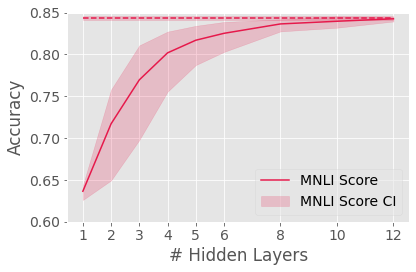

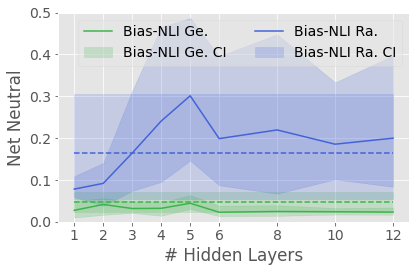

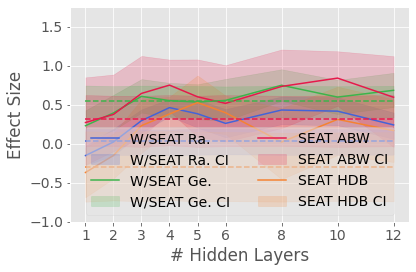

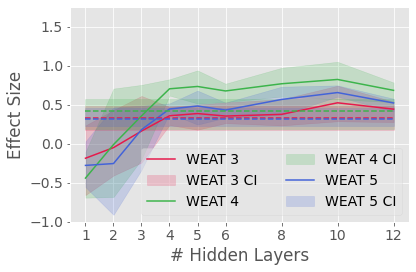

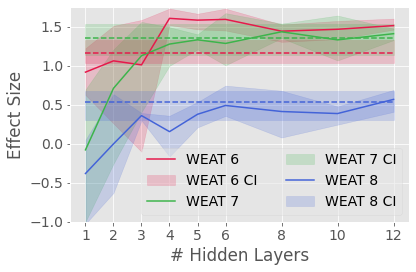

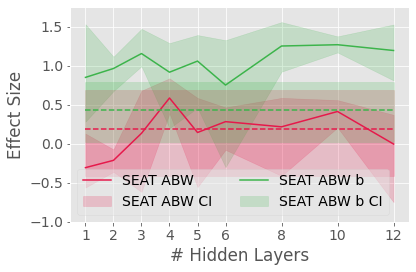

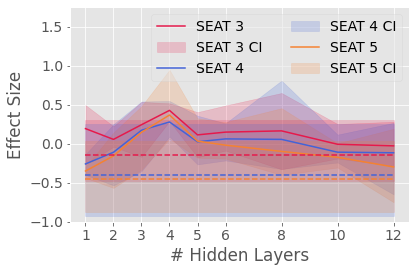

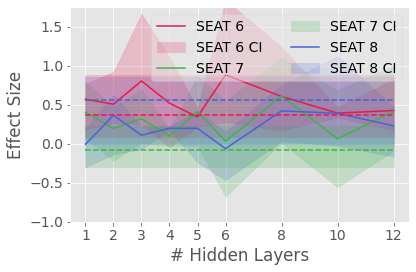

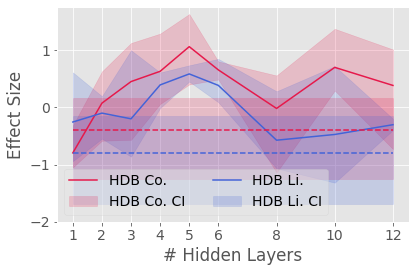

In [81]:
create_plots(df_hl, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mnli_no_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

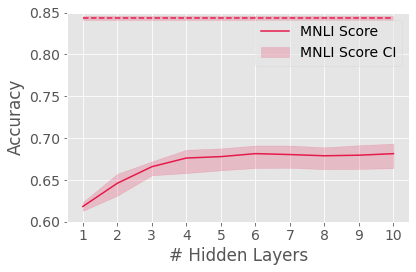

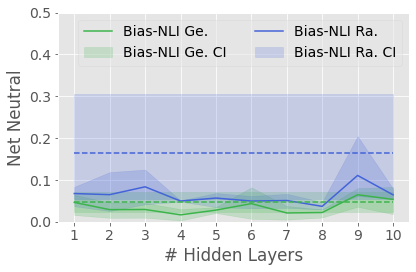

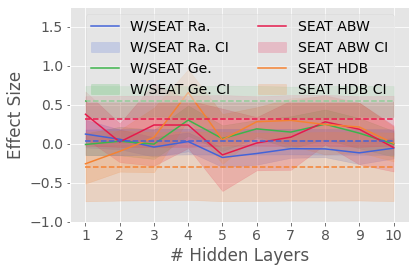

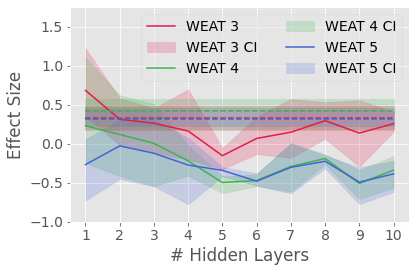

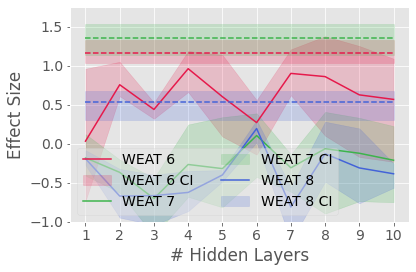

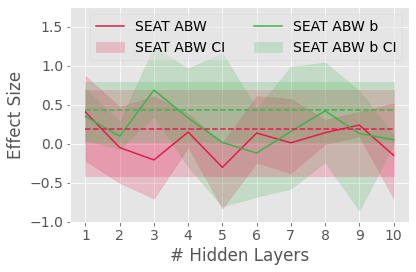

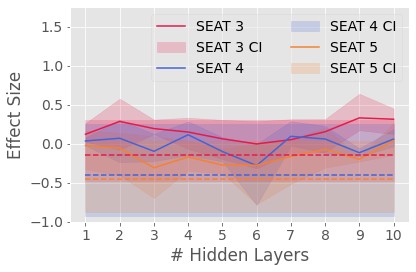

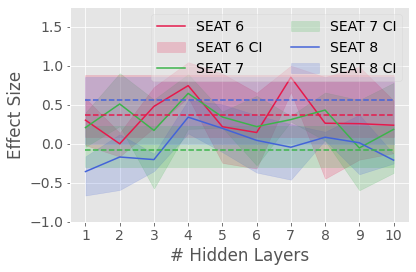

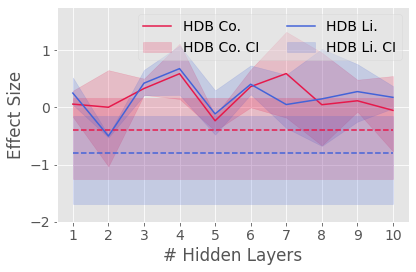

In [82]:
create_plots(df_mnli_hl_no_init_no_ma, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mnli_no_init_no_ma")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

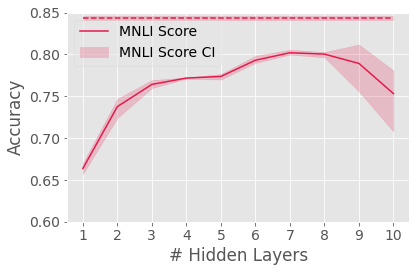

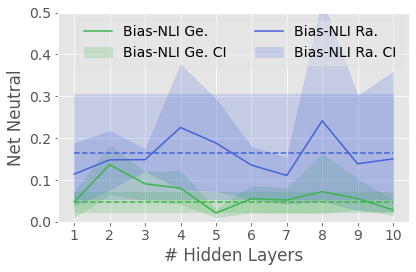

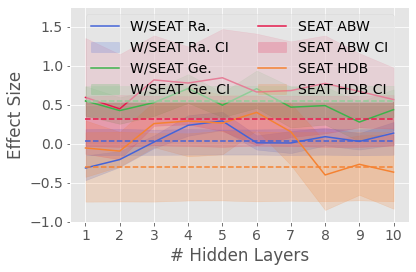

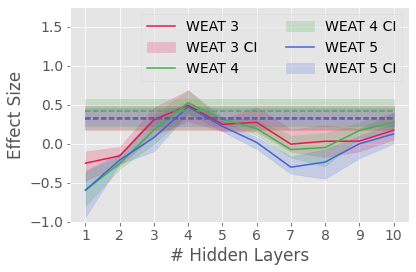

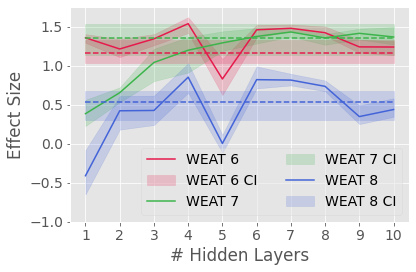

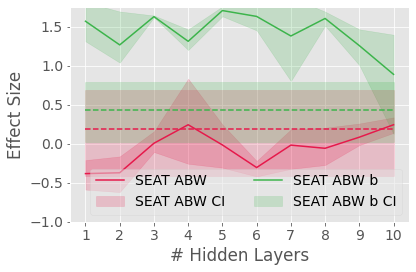

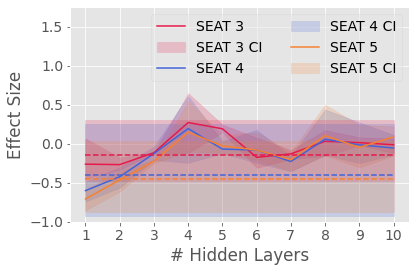

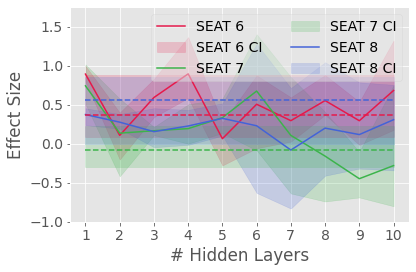

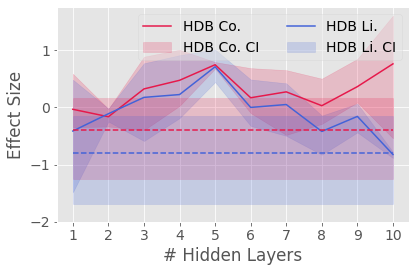

In [83]:
create_plots(df_mnli_hl_all_init, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mnli_all_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

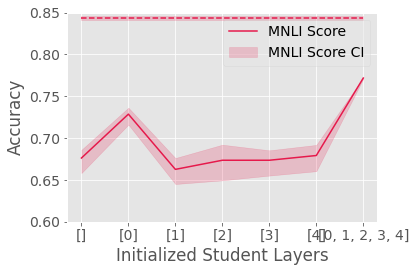

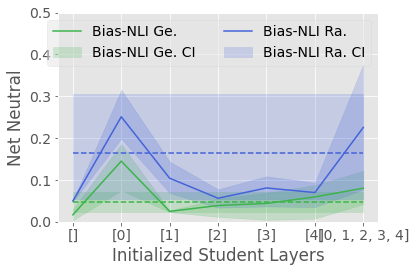

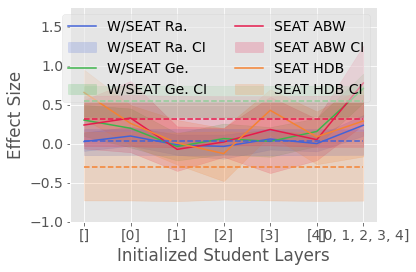

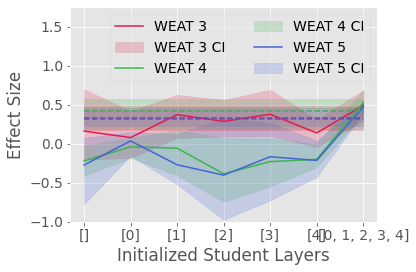

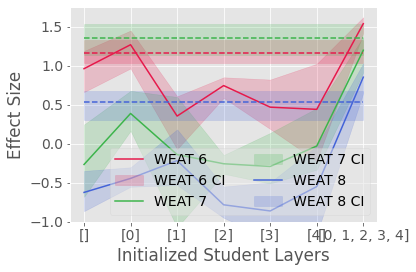

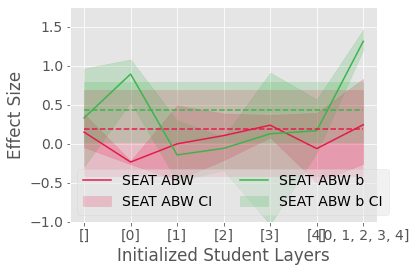

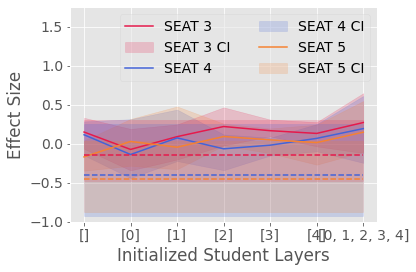

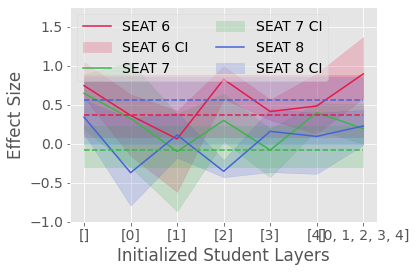

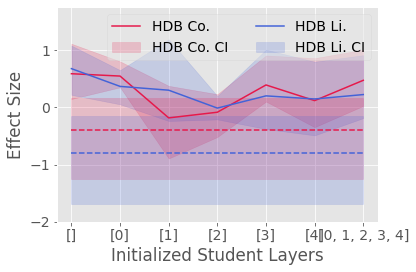

In [84]:

create_plots(df_init, df_mnli_teacher, "init_layers", "mnli", "plots/hl_mnli_diff_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

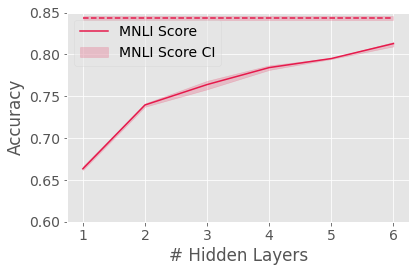

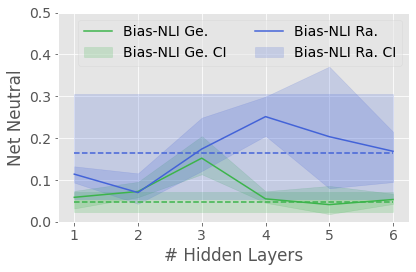

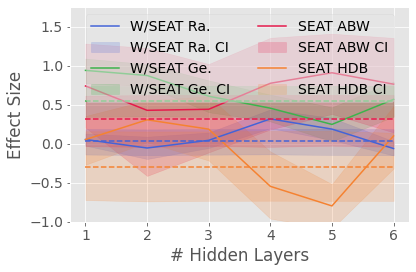

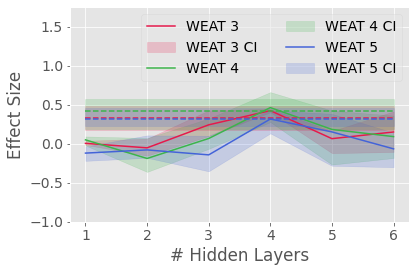

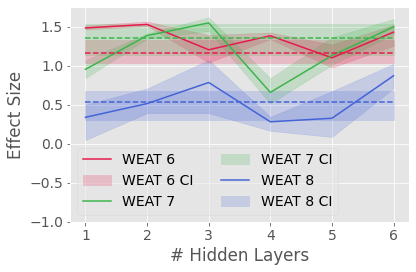

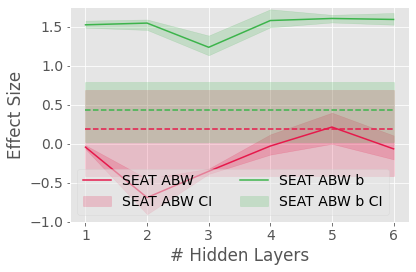

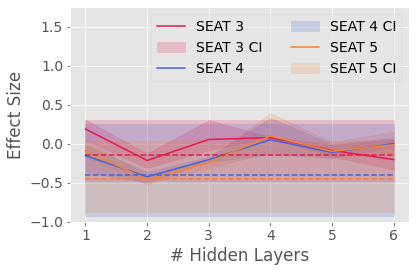

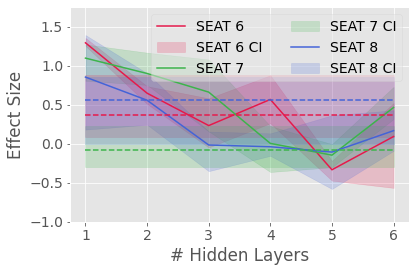

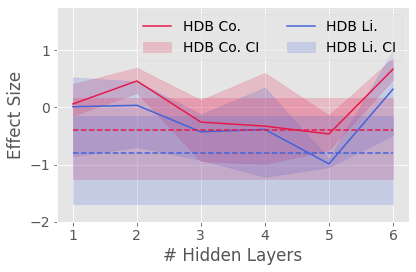

In [85]:
create_plots(df_mlm_mnli, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mlm_mnli")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

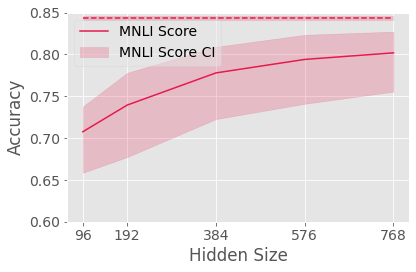

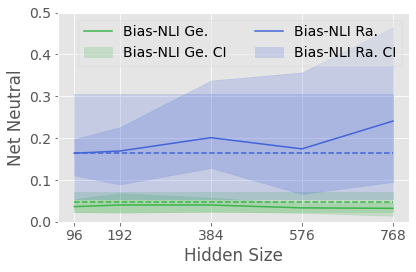

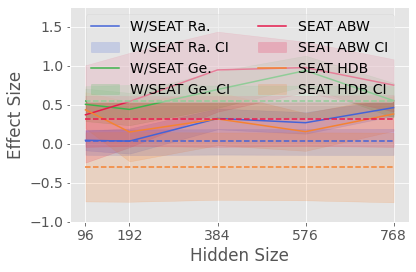

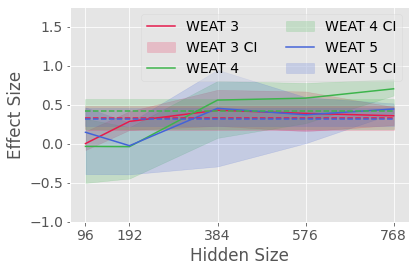

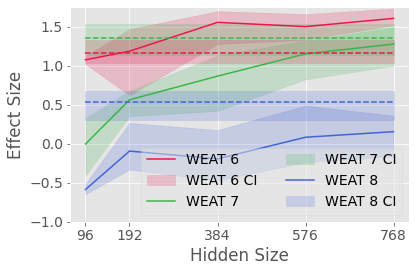

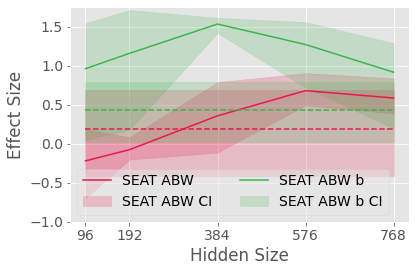

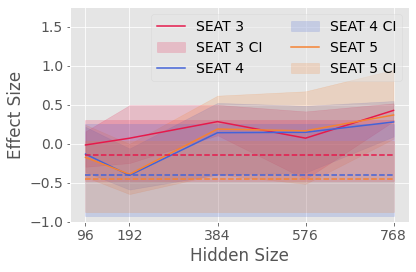

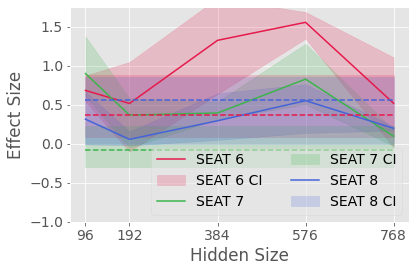

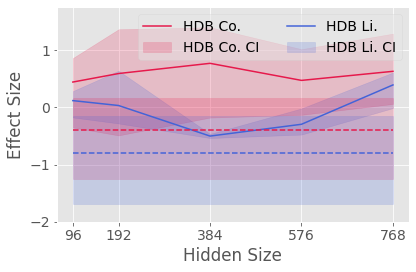

In [86]:
create_plots(df_hs, df_mnli_teacher, "hidden_size", "mnli", "plots/hs_mnli")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

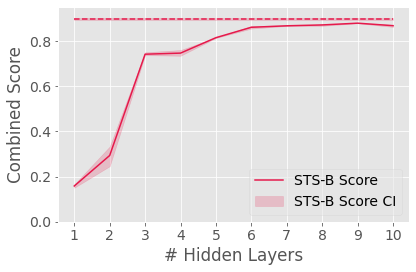

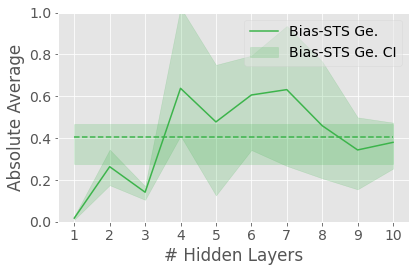

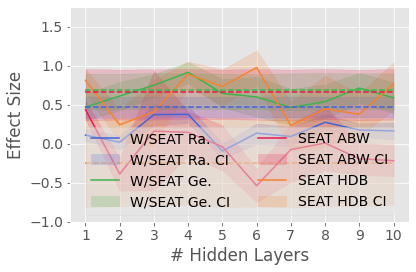

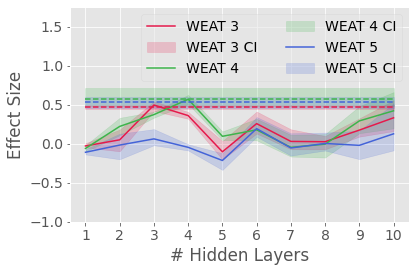

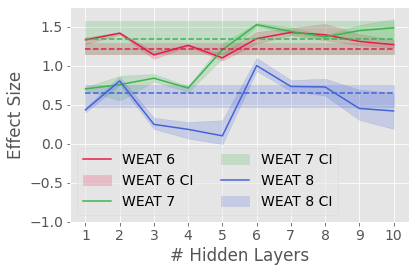

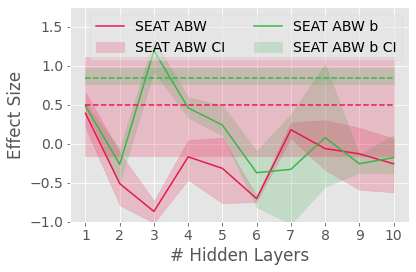

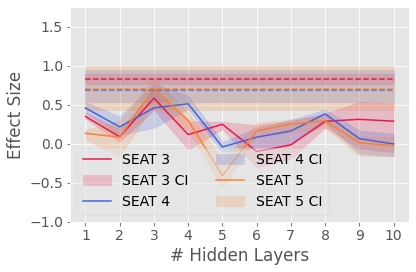

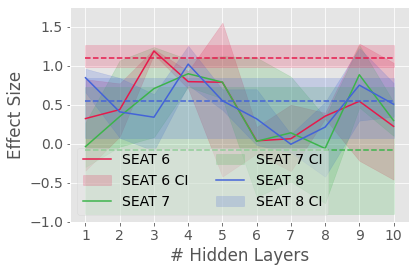

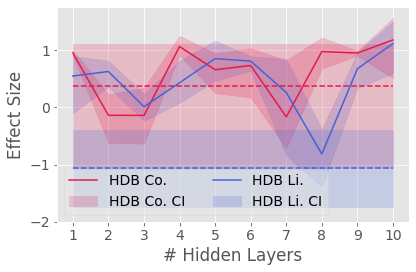

In [87]:
create_plots(df_stsb_hl_init, df_stsb_teacher, "num_hidden_layers", "stsb", "plots/hl_stsb_all_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

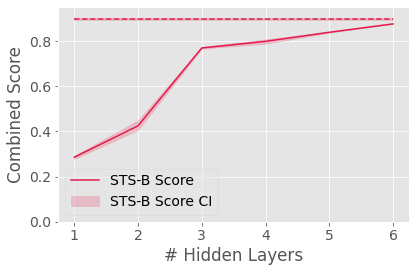

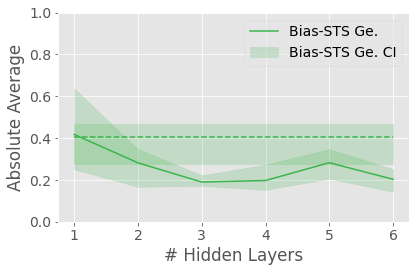

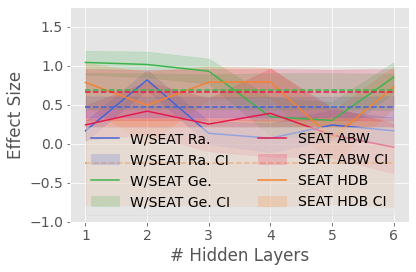

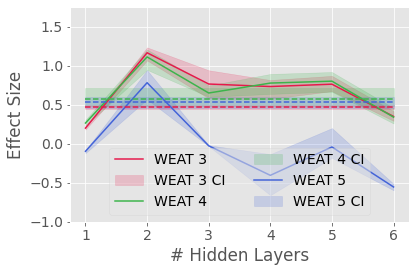

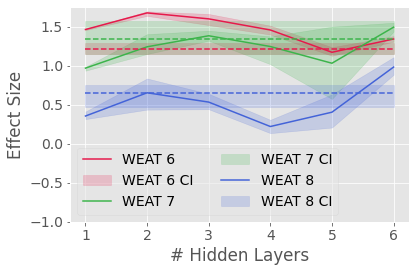

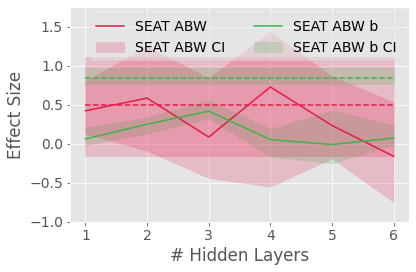

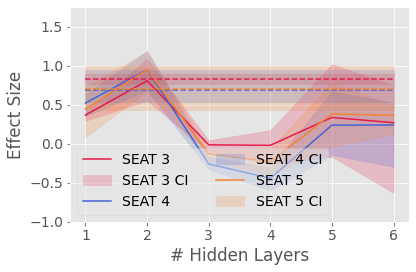

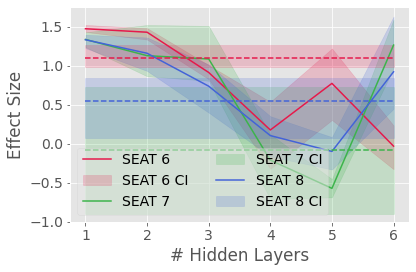

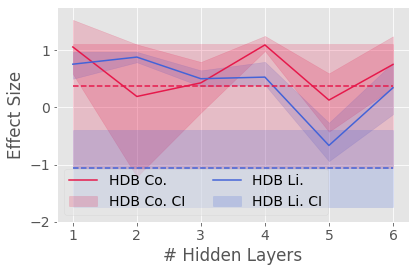

In [88]:
create_plots(df_mlm_stsb, df_stsb_teacher, "num_hidden_layers", "stsb", "plots/hl_mlm_stsb")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

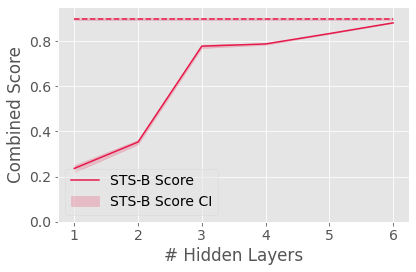

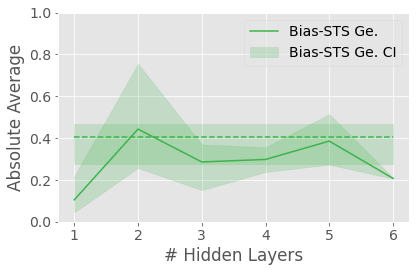

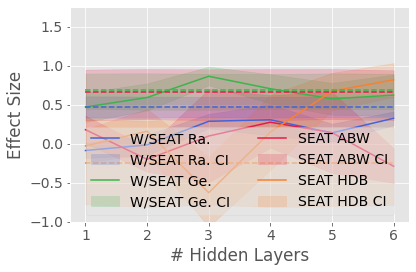

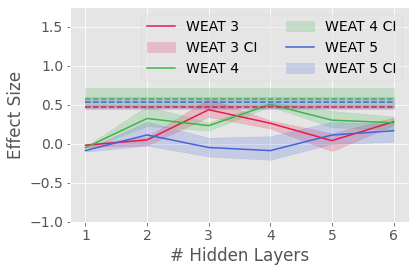

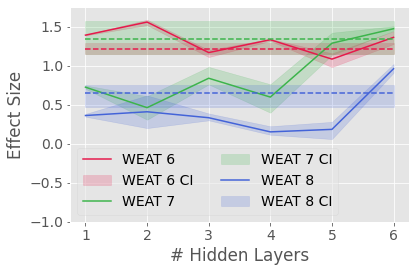

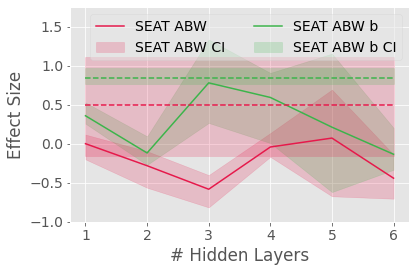

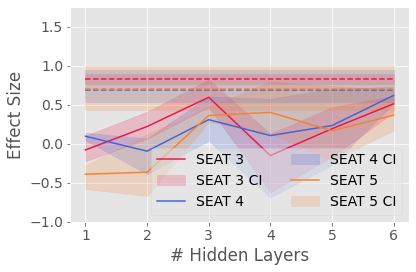

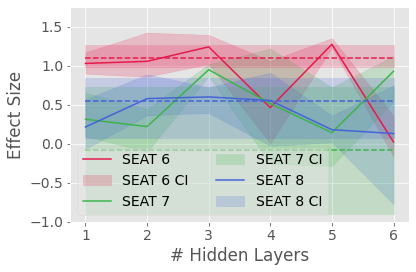

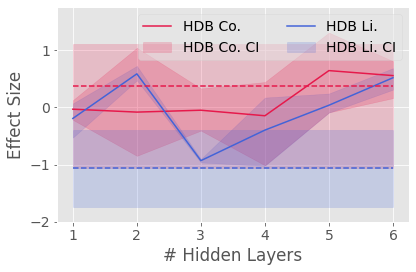

In [89]:
create_plots(df_mlm_debias_stsb, df_stsb_teacher, "num_hidden_layers", "stsb", "plots/hl_mlm_debias_stsb")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

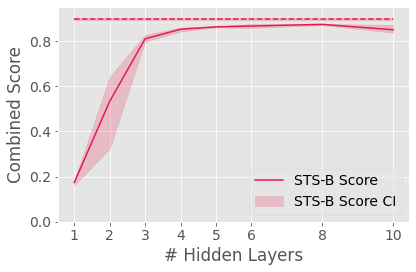

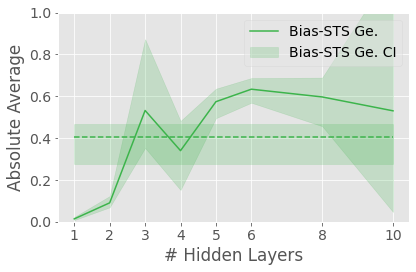

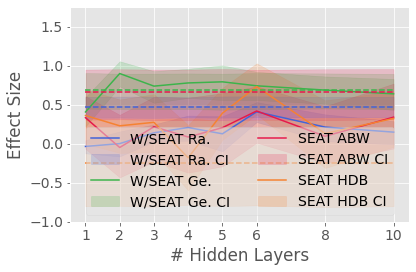

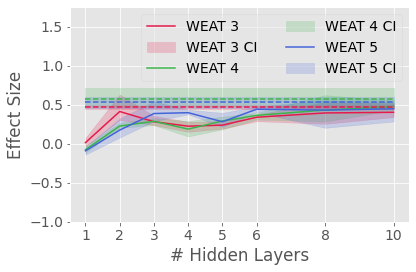

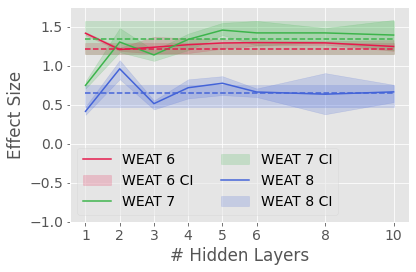

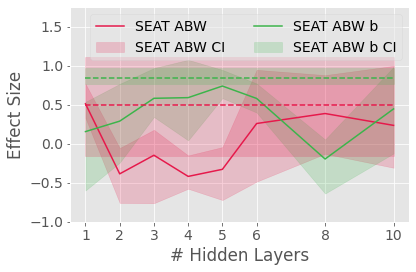

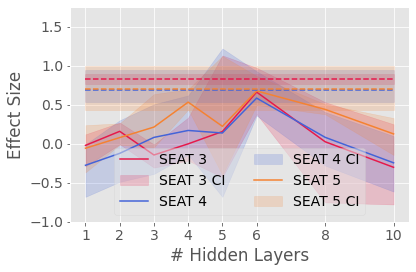

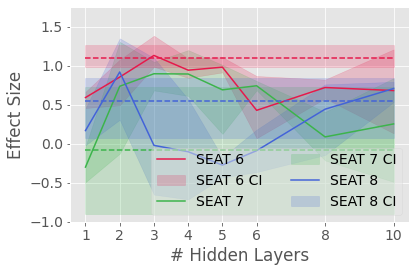

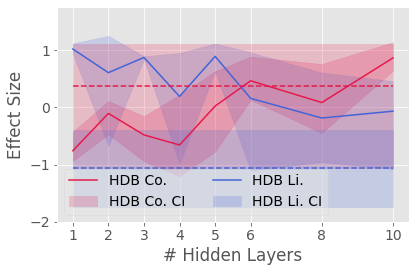

In [90]:
create_plots(df_stsb_hl_init_bias7, df_stsb_teacher, "num_hidden_layers", "stsb", "plots/hl_stsb_bias7_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

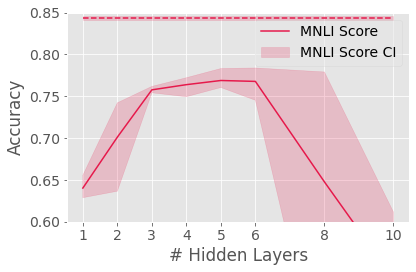

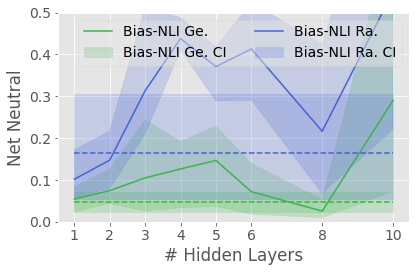

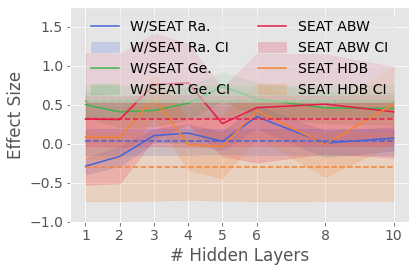

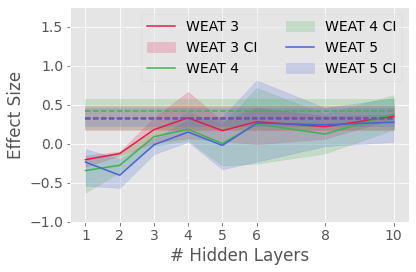

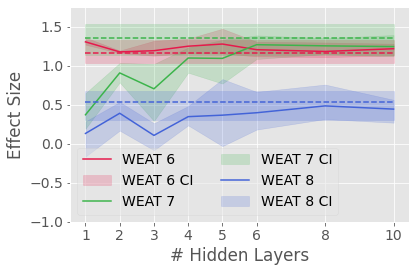

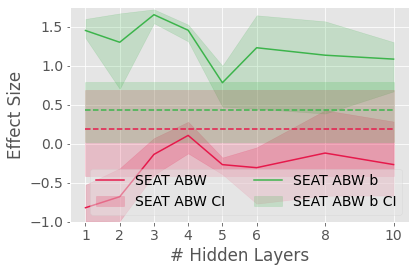

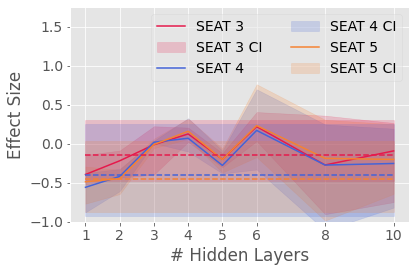

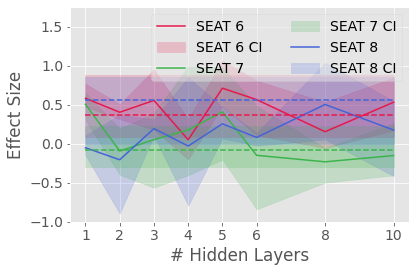

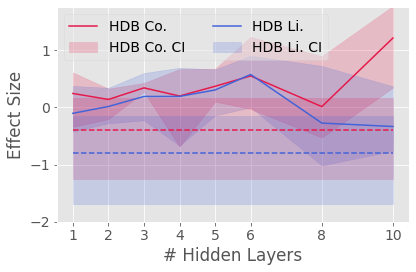

In [91]:
create_plots(df_mnli_hl_init_bias7, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mnli_bias7_init")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

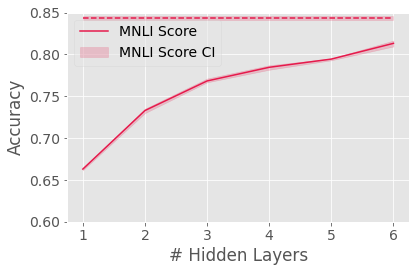

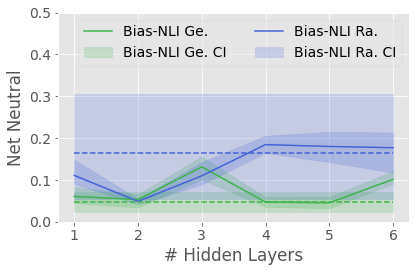

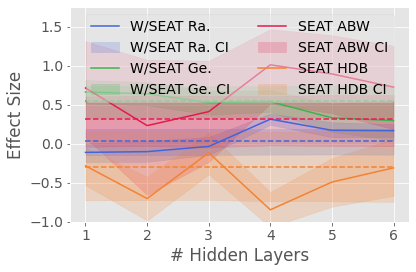

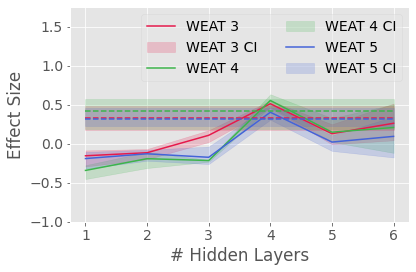

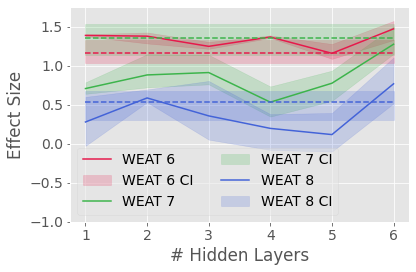

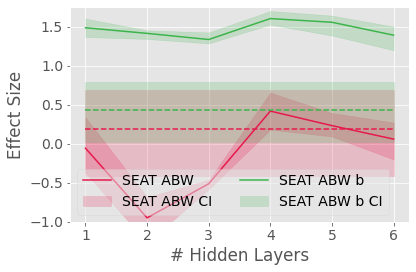

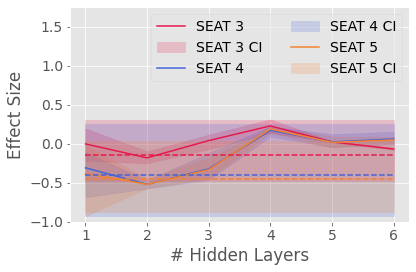

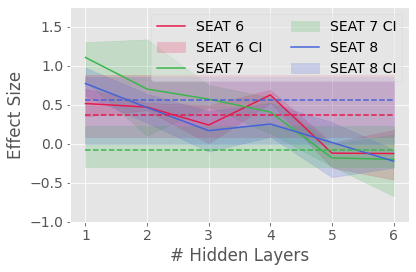

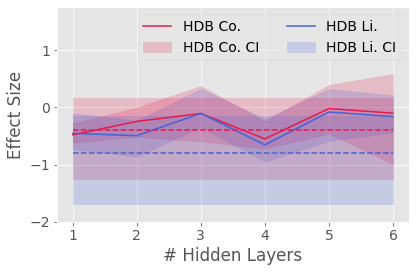

In [92]:
create_plots(df_mlm_debias_mnli, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mlm_debias_mnli")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

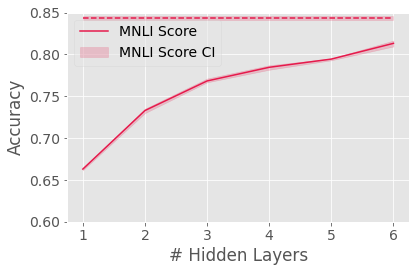

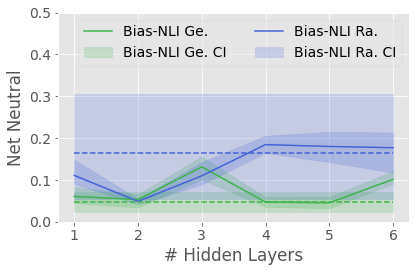

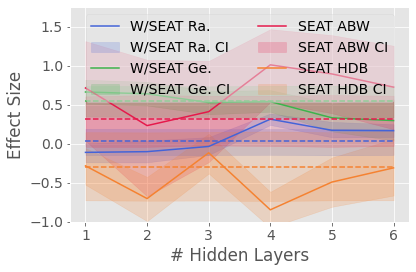

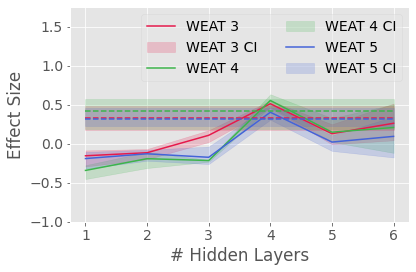

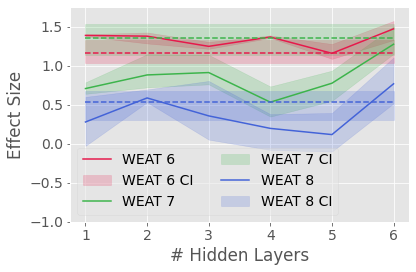

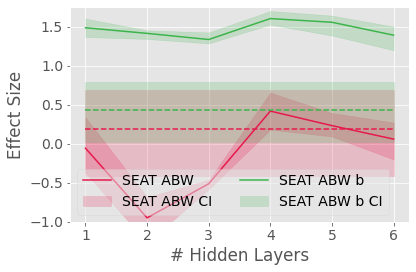

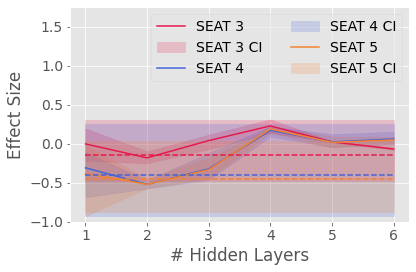

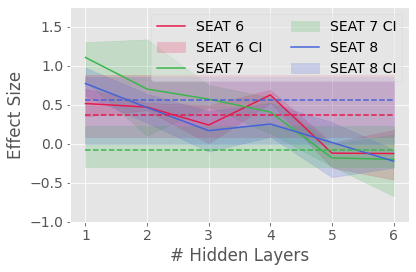

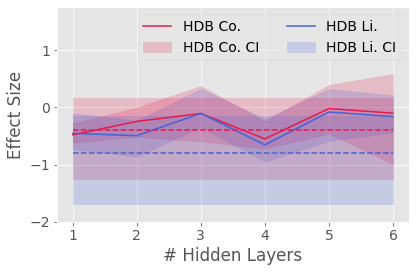

In [93]:
create_plots(df_mlm_debias_mnli, df_mnli_teacher, "num_hidden_layers", "mnli", "plots/hl_mlm_debias_mnli")

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

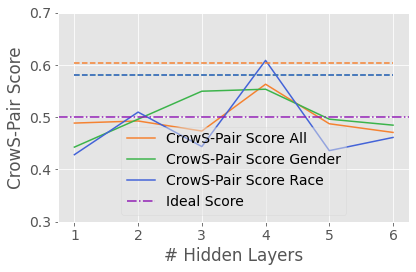

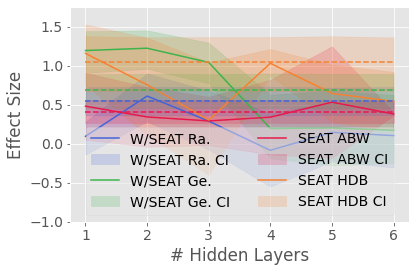

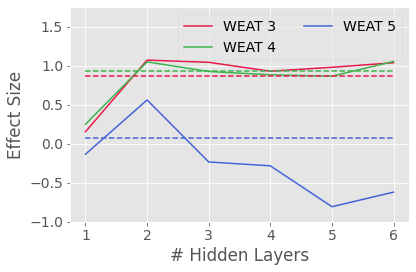

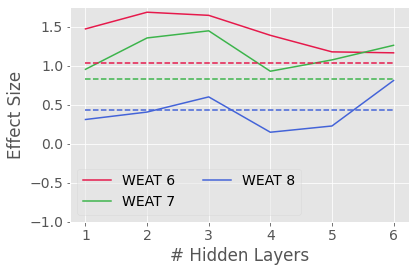

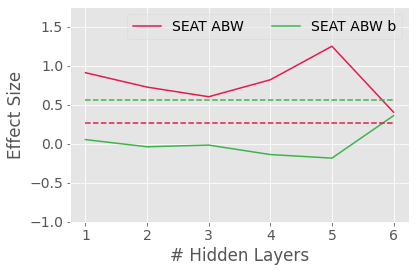

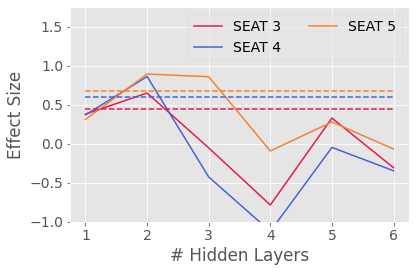

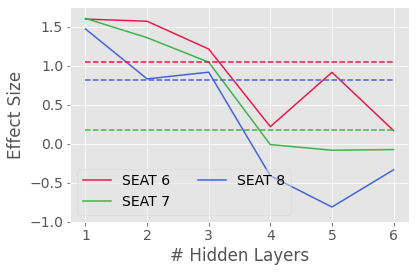

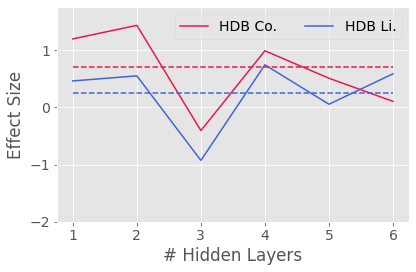

In [94]:
create_plots(df_mlm, df_mlm_teacher, "num_hidden_layers", "mlm", "plots/hl_mlm",seeds = [1909])

/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate_teacher = df_duplicate_teacher.append(df_temp)
/tmp/ipykernel_1812374/1795075500.py:35: FutureWarning: 

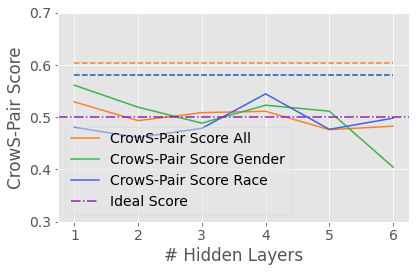

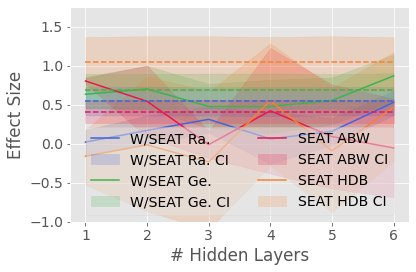

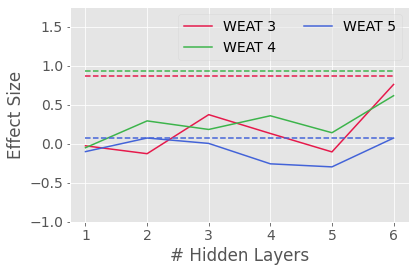

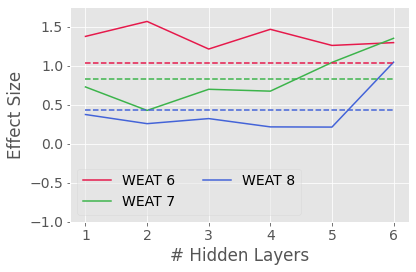

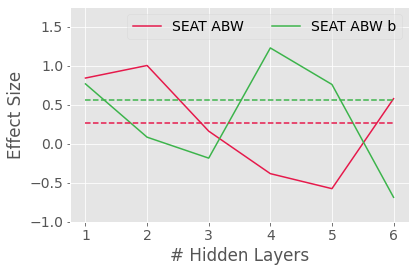

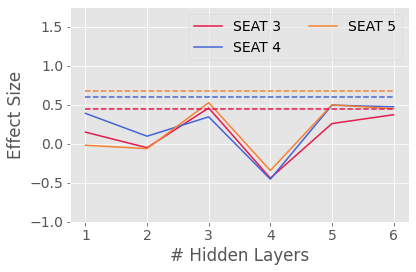

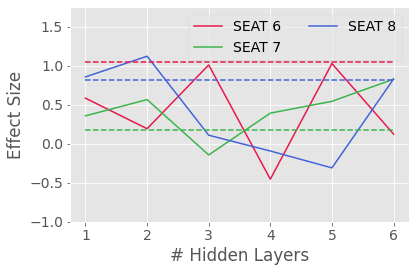

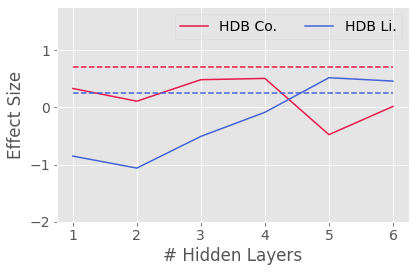

In [95]:
create_plots(df_mlm_debias, df_mlm_teacher, "num_hidden_layers", "mlm", "plots/hl_mlm_debias",seeds = [1909])